# Identitas Kelompok
Nomor Kelompok: 5

Nama Kelompok: Lima-B-Aja

Ketua Kelompok: Fajar Arahman

Anggota kelompok:
1. MUHAMAD FAHMI AMIQ
2. FAJAR ARAHMAN
3. AMMAR KHAQ BAASIR
4. LIANUS
5. INDAH LESTARI
6. NADILA
7. FATIHAH
8. Meilia Choirun Nisa 

Pilihan Dataset: E-commerce Churn Rate

# Import Library & Load Dataset

In [290]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import missingno as msno

print(pd.__version__)
print(np.__version__)
print(matplotlib.__version__)
print(sns.__version__)

2.1.1
1.26.0
3.8.0
0.13.0


In [291]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

# STAGE 1 EDA, VISUALIZATION

In [292]:
df = pd.read_excel('dataset/e_commerce.xlsx', sheet_name=1)
df.head() 

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


# 1. Descriptive Statistics

In [293]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [294]:
df.PreferredLoginDevice.unique()

array(['Mobile Phone', 'Phone', 'Computer'], dtype=object)

In [295]:
df.PreferredPaymentMode.unique()

array(['Debit Card', 'UPI', 'CC', 'Cash on Delivery', 'E wallet', 'COD',
       'Credit Card'], dtype=object)

In [296]:
df.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [297]:
df.PreferedOrderCat.unique()

array(['Laptop & Accessory', 'Mobile', 'Mobile Phone', 'Others',
       'Fashion', 'Grocery'], dtype=object)

In [298]:
df.MaritalStatus.unique()

array(['Single', 'Divorced', 'Married'], dtype=object)

In [299]:
df.duplicated().sum()

0

**Analisa**
* Jumlah data ada 5630 baris dan 20 kolom
* Tidak ada duplikat pada dataset
* Pada bagian PreferredPaymentethod terdapat kesamaan yaitu variabel 'Cash on Delivery' dengan 'COD' selain itu 'Credit Card' dengan 'CC'
* Pada kolom PreferedOrderCat terdapat kesamaan yaitu variabel 'Mobile' dan 'Mobile Phone'

* Pada kolom PreferredLoginDevice terdapat kesamaan yaitu variable 'Mobile Phone' dan 'Phone'

* A. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya kurang sesuai?

Pada bagian PreferredPaymentethod terdapat kesamaan yaitu variabel 'Cash on Delivery' dengan 'COD' selain itu 'Credit Card' dengan 'CC'

Pada kolom PreferedOrderCat terdapat kesamaan yaitu variabel 'Mobile' dan 'Mobile Phone'

Pada kolom PreferredLoginDevice terdapat kesamaan yaitu variable 'Mobile Phone' dan 'Phone'

* B. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?

In [300]:
for i in df.columns:
    if df[i].isnull().sum() > 0:
        print(i)
        print('Jumlah data yang null:', df[i].isnull().sum())
        print('Tipe Data yaitu', df[i].dtypes)
        print()

Tenure
Jumlah data yang null: 264
Tipe Data yaitu float64

WarehouseToHome
Jumlah data yang null: 251
Tipe Data yaitu float64

HourSpendOnApp
Jumlah data yang null: 255
Tipe Data yaitu float64

OrderAmountHikeFromlastYear
Jumlah data yang null: 265
Tipe Data yaitu float64

CouponUsed
Jumlah data yang null: 256
Tipe Data yaitu float64

OrderCount
Jumlah data yang null: 258
Tipe Data yaitu float64

DaySinceLastOrder
Jumlah data yang null: 307
Tipe Data yaitu float64



* C. Apakah ada kolom yang memiliki nilai summary agak aneh? (min/mean/median/max/unique/top/freq) 


In [301]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CustomerID,5630.0,52815.500000,1625.385339,50001.0,51408.25,52815.50,54222.7500,55630.00
Churn,5630.0,0.168384,0.374240,0.0,0.00,0.00,0.0000,1.00
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.00,16.0000,61.00
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.00,3.0000,3.00
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.00,20.0000,127.00
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.00,3.0000,5.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.00,4.0000,6.00
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.00,4.0000,5.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.00,6.0000,22.00
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.00,1.0000,1.00


Tidak ada keanehan

### Pembagian Kategori

In [302]:
cats =['PreferredLoginDevice', 
                 'PreferredPaymentMode',
                 'Gender',
                 'PreferedOrderCat',
                 'MaritalStatus']

nums = ['CustomerID', 
              'Tenure', 
              'CityTier', 
              'WarehouseToHome', 
              'HourSpendOnApp', 
              'NumberOfDeviceRegistered', 
              'SatisfactionScore', 
              'NumberOfAddress', 
              'Complain', 
              'OrderAmountHikeFromlastYear',
              'CouponUsed', 
              'OrderCount', 
              'DaySinceLastOrder', 
              'CashbackAmount', 
              'Churn']

In [303]:
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print('\n')

Value count kolom PreferredLoginDevice:
PreferredLoginDevice
Mobile Phone    2765
Computer        1634
Phone           1231
Name: count, dtype: int64


Value count kolom PreferredPaymentMode:
PreferredPaymentMode
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: count, dtype: int64


Value count kolom Gender:
Gender
Male      3384
Female    2246
Name: count, dtype: int64


Value count kolom PreferedOrderCat:
PreferedOrderCat
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: count, dtype: int64


Value count kolom MaritalStatus:
MaritalStatus
Married     2986
Single      1796
Divorced     848
Name: count, dtype: int64




In [304]:
df.isna().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

## Persentase missing value

In [305]:
# jumlah data null
grouped_data = []
for col in df.columns:
    n_missing = df[col].isnull().sum()
    percentage = n_missing / df.shape[0] * 100
    grouped_data.append([col, n_missing, percentage])

grouped_df = pd.DataFrame(grouped_data, columns=['column', 'n_missing', 'percentage'])

result = grouped_df.groupby(['column', 'n_missing', 'percentage']).size()
result

column                       n_missing  percentage
CashbackAmount               0          0.000000      1
Churn                        0          0.000000      1
CityTier                     0          0.000000      1
Complain                     0          0.000000      1
CouponUsed                   256        4.547069      1
CustomerID                   0          0.000000      1
DaySinceLastOrder            307        5.452931      1
Gender                       0          0.000000      1
HourSpendOnApp               255        4.529307      1
MaritalStatus                0          0.000000      1
NumberOfAddress              0          0.000000      1
NumberOfDeviceRegistered     0          0.000000      1
OrderAmountHikeFromlastYear  265        4.706927      1
OrderCount                   258        4.582593      1
PreferedOrderCat             0          0.000000      1
PreferredLoginDevice         0          0.000000      1
PreferredPaymentMode         0          0.000000     

* CouponUsed = 4.54%
* DaySinceLastOrder = 5.45%
* HourSpendOnApp = 4.52%
* OrderAmountHikeFromlastYear = 4.7%
* OrderCount = 4.58%
* Tenure = 4.68%
* WarehouseToHome = 4.45%

# 2. Univariate Analysis

Gunakan visualisasi untuk melihat distribusi masing-masing kolom (feature maupun
target). Tuliskan hasil observasinya, misalnya jika ada suatu kolom yang distribusinya
menarik (misal skewed, bimodal, ada outlier, ada nilai yang mendominasi, kategorinya
terlalu banyak, dsb). Jelaskan juga apa yang harus di-follow up saat data pre-processing.

### Box Plot

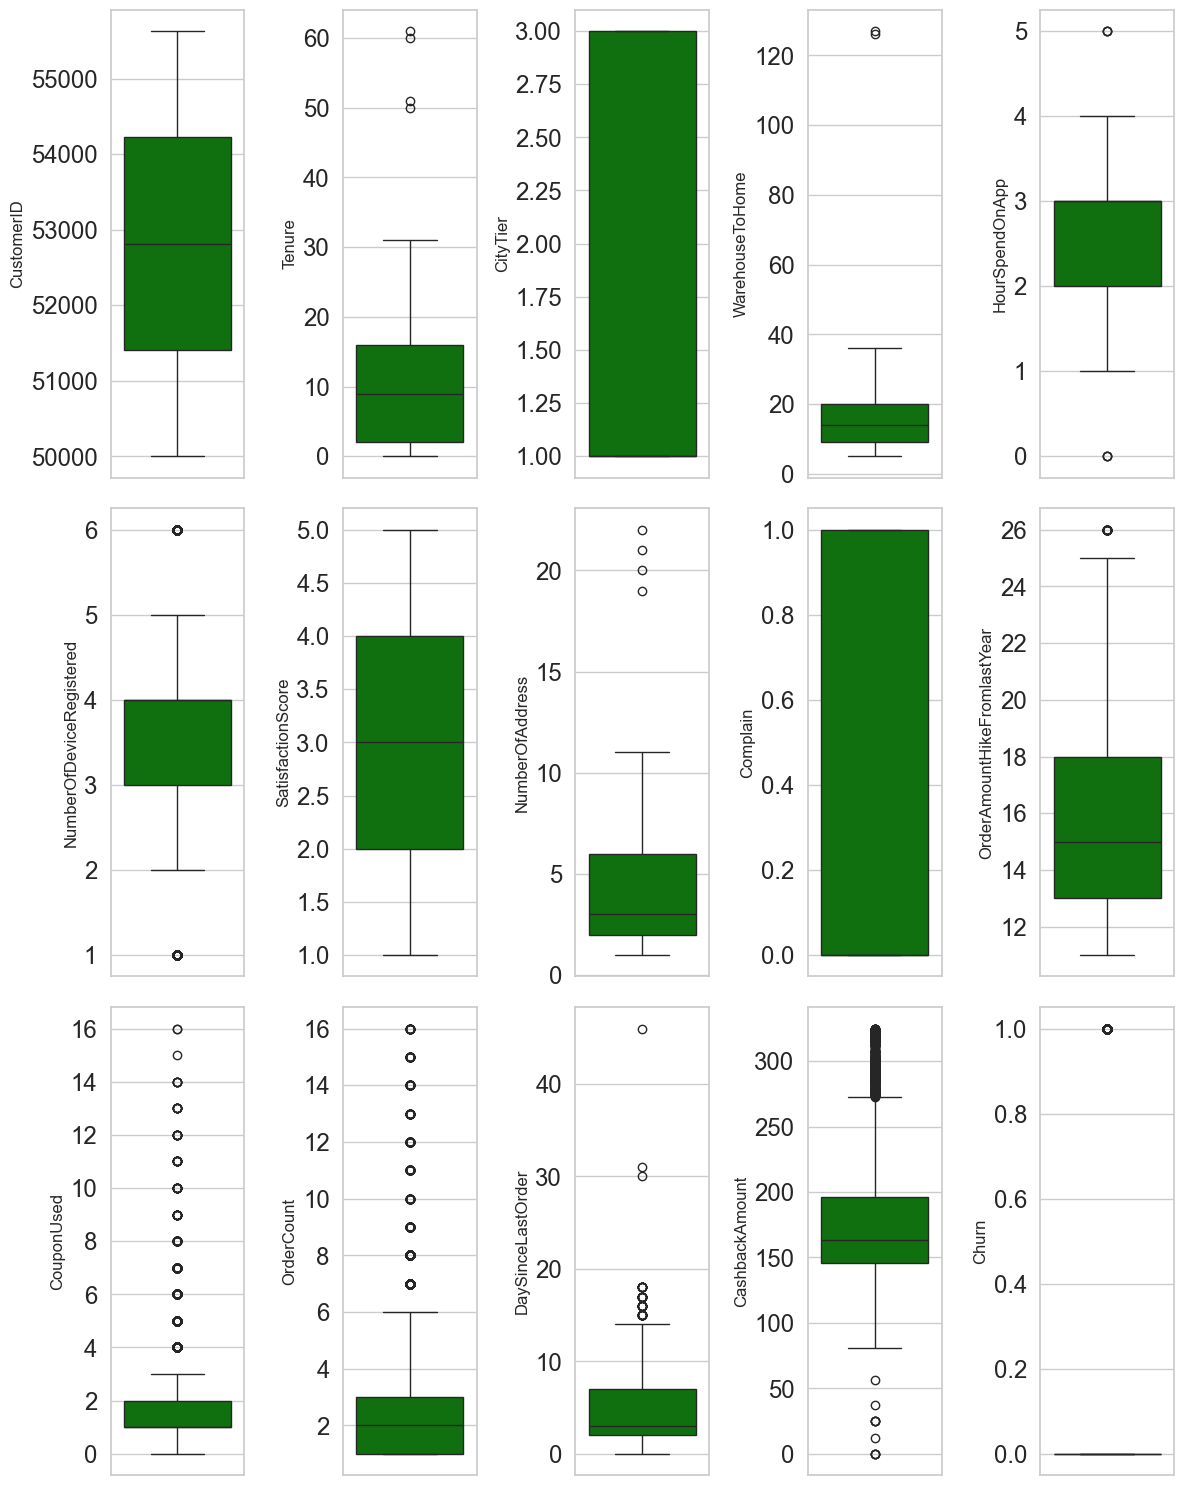

In [306]:
plt.figure(figsize=(12, 20))
for i in range(0, len(nums)):
    plt.subplot(4, int(len(nums)/3), i+1)
    sns.boxplot(y=df[nums[i]], color='green', orient='v')
    plt.tight_layout()

**Hasil Observasi Boxplot:**
> Semua data numerik memiliki outlier


### Distribution Graph

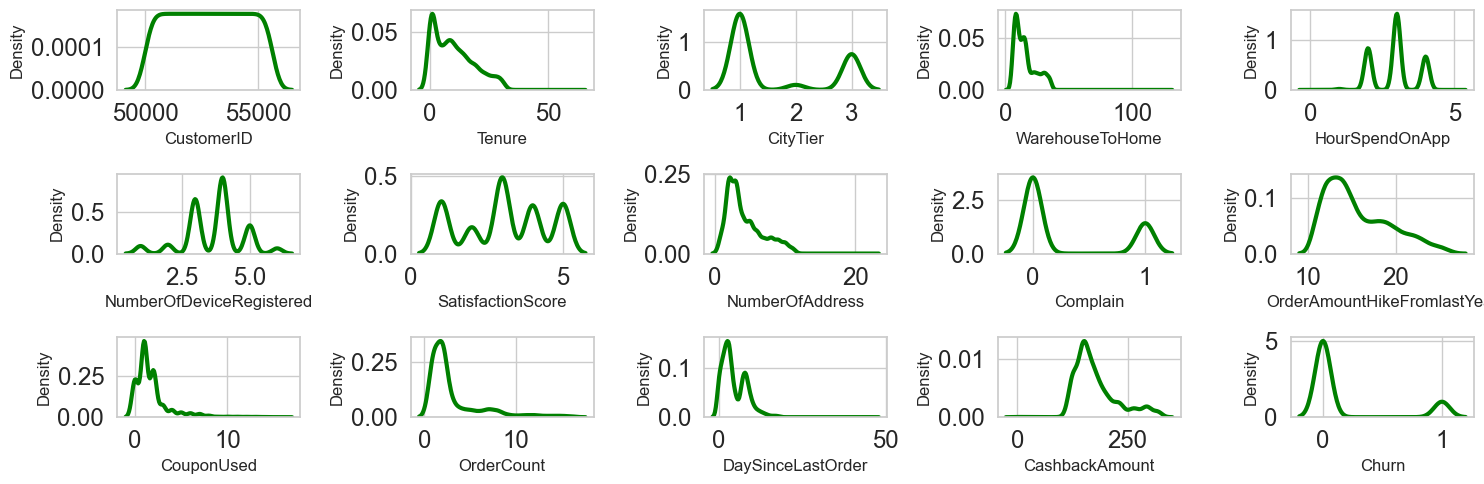

In [307]:
plt.figure(figsize=(15, 5))
for i in range(0, len(nums)):
    plt.subplot(3, 5, i+1)
    sns.kdeplot(x=df[nums[i]], color='green')
    plt.xlabel(nums[i])
    plt.tight_layout()

**Hasil Observasi:**

| Fitur                     | Jenis Distribusi             | Deskripsi                                                      | Tindak Lanjut                                                   |
|---------------------------|------------------------------|-----------------------------------------------------------------|-------------------------------------------------------------------|
| CustomerID                | Uniform                      | Setiap ID bersifat unik dan muncul kira-kira satu kali.          | Pertimbangkan untuk menurunkan fitur ini karena mungkin tidak berguna untuk model prediksi.                                |
| Tenure                    | Bimodal                      | Ada dua kelompok pelanggan berdasarkan masa kerja mereka.         | Selidiki alasan bimodality dan pertimbangkan segmentasi pelanggan berdasarkan masa kerja untuk strategi yang lebih tertarget.     |
| CityTier                  | Multimodal (tiga puncak)      | Mayoritas pelanggan berada pada tingkat 1 dan 2, dengan lebih sedikit pelanggan pada tingkat 3. | Pertimbangkan one-hot encoding untuk representasi yang akurat saat pemodelan.                                             |
| WarehouseToHome           | Right-skewed                 | Sebagian besar pelanggan tinggal lebih dekat dengan gudang.       | Terapkan transformasi seperti log atau akar kuadrat untuk mengurangi kemiringan.                                              |
| HourSpendOnApp            | Bimodal                      | Menunjukkan dua kelompok utama perilaku pengguna terkait durasi penggunaan aplikasi. | Selidiki alasan bimodality dan pertimbangkan segmentasi pengguna berdasarkan waktu penggunaan aplikasi.                    |
| NumberOfDeviceRegistered  | Right-skewed                 | Mayoritas pelanggan mendaftarkan 2-3 perangkat.                    | Terapkan transformasi seperti log atau akar kuadrat untuk mengurangi kemiringan.                                              |
| SatisfactionScore         | Multimodal (tiga puncak)      | Beragam tingkat kepuasan pelanggan.                               | Mensegmentasikan pelanggan berdasarkan skor ini dapat memberikan wawasan yang berguna.                                        |
| NumberOfAddress           | Right-skewed                 | Mayoritas pelanggan mendaftarkan 1-2 alamat.                       | Terapkan transformasi seperti log atau akar kuadrat untuk mengurangi kemiringan.                                              |
| Complain                  | Mayoritas nilai 0            | Mayoritas pelanggan belum mengajukan keluhan.                      | Periksa ketidakseimbangan kelas jika digunakan sebagai fitur. Mungkin diperlukan oversampling atau undersampling.            |
| OrderAmountHikeFromlastYear | Bimodal                     | Dua kelompok berbeda di sekitar nilai 10 dan 20.                   | Telusuri alasan bimodality dan pertimbangkan segmentasi berdasarkan kenaikan jumlah pesanan.                                 |
| CouponUsed                | Right-skewed                 | Mayoritas pelanggan menggunakan sejumlah kecil kupon.               | Pertimbangkan normalisasi menggunakan transformasi log atau akar kuadrat untuk mengatasi kemiringan.                        |
| OrderCount                | Right-skewed                 | Mayoritas pelanggan memiliki jumlah pesanan yang lebih rendah.      | Pertimbangkan normalisasi menggunakan transformasi untuk mengatasi kemiringan.                                              |
| DaySinceLastOrder         | Puncak di sekitar 20 hari    | Mayoritas pelanggan memiliki jeda sekitar 20 hari sejak pesanan terakhir mereka. | Telusuri alasan puncak ini untuk mendapatkan wawasan tentang perilaku pelanggan.                                        |
| CashbackAmount            | Right-skewed                 | Mayoritas pelanggan menerima jumlah cashback yang lebih kecil.     | Pertimbangkan normalisasi menggunakan transformasi untuk mengatasi kemiringan.                                              |
| Churn                     | Distribusi Biner             | Lebih sedikit pelanggan yang churn dibandingkan yang tidak.        | Pastikan tidak ada ketidakseimbangan kelas. Gunakan oversampling, undersampling, atau metrik evaluasi yang sesuai.             |


### Histogram categorical data

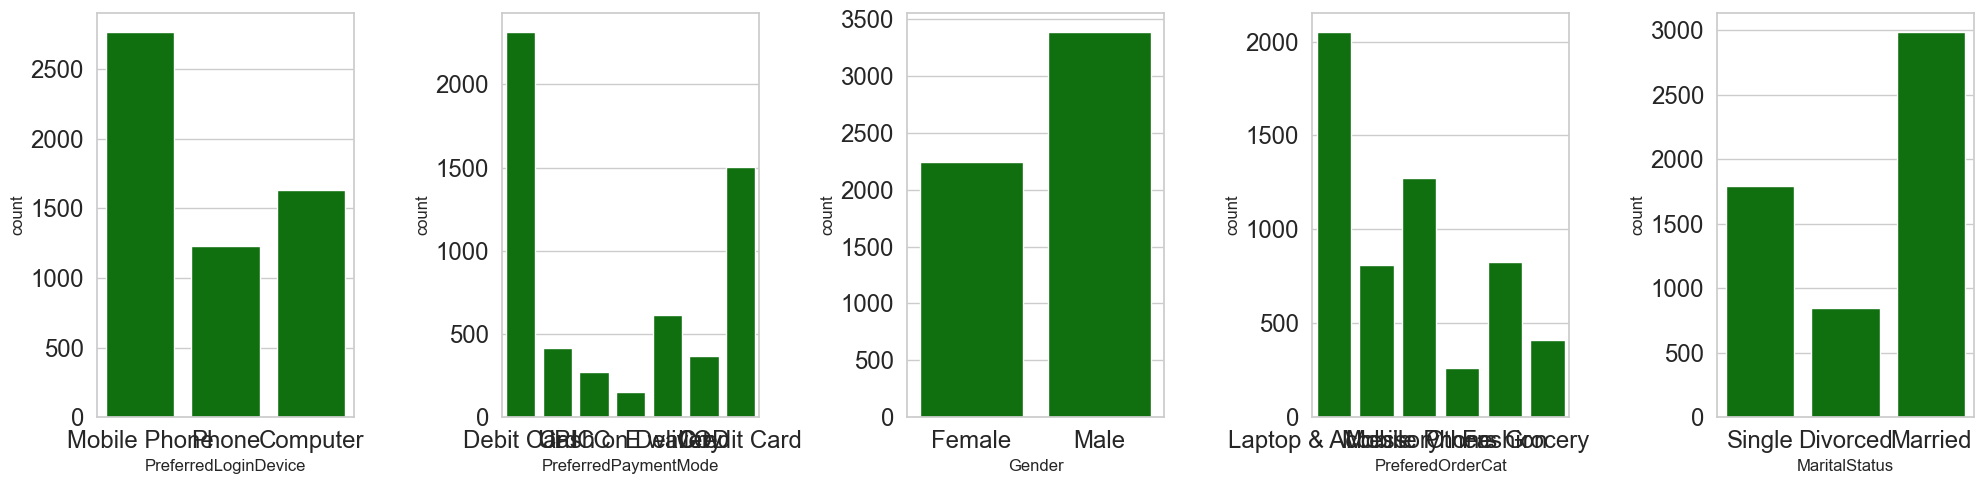

In [308]:
plt.figure(figsize=(20,5))
for i in range(0, len(cats)):
    plt.subplot(1, len(cats), i+1)
    sns.countplot(x=df[cats[i]], color ='green')
    plt.tight_layout()

**Hasil Observasi:** 
> * PrefferedLoginDevice mayoritas adalah Mobile Phone
> * PrefferedPaymentMode mayoritas adalah Debit Card
> * Gender mayoritas adalah Male
> * PrefferedOrderCat mayoritas adalah Laptop & Accessory
> * MaritalStatus mayoritas adalah Married

# 3. Multivariate Analysis

Lakukan multivariate analysis (seperti correlation heatmap dan category plots, sesuai yang
diajarkan di kelas). Tuliskan hasil observasinya, seperti:
* A. Bagaimana korelasi antara masing-masing feature dan label. Kira-kira feature mana saja yang paling relevan dan harus dipertahankan?
* B. Bagaimana korelasi antar-feature, apakah ada pola yang menarik? Apa yang perlu dilakukan terhadap feature itu?
* Tuliskan juga jika memang tidak ada feature yang saling berkorelasi

In [309]:
df[nums].corr()

,CustomerID,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Churn
CustomerID,1.000000,0.029952,0.003239,0.058909,0.598417,0.411098,-0.033146,0.160814,-0.009944,0.117243,0.234302,0.139008,0.113243,0.217129,-0.019083
Tenure,0.029952,1.000000,-0.060688,-0.018218,-0.021226,-0.023983,-0.013903,0.237666,-0.021268,0.005825,0.129035,0.186403,0.184552,0.476380,-0.349408
CityTier,0.003239,-0.060688,1.000000,0.010624,-0.009150,0.027934,-0.011554,-0.029440,0.003375,-0.031408,0.021456,0.033388,0.017525,0.055746,0.084703
WarehouseToHome,0.058909,-0.018218,0.010624,1.000000,0.060990,0.019071,0.007722,-0.011020,0.028696,0.038795,-0.003935,0.002681,0.017829,-0.009200,0.076630
HourSpendOnApp,0.598417,-0.021226,-0.009150,0.060990,1.000000,0.316800,0.031858,0.145126,0.006976,0.106843,0.191528,0.109575,0.075716,0.121490,0.018675
NumberOfDeviceRegistered,0.411098,-0.023983,0.027934,0.019071,0.316800,1.000000,-0.017228,0.084997,0.003407,0.069475,0.151685,0.103464,0.018208,0.137183,0.107939
SatisfactionScore,-0.033146,-0.013903,-0.011554,0.007722,0.031858,-0.017228,1.000000,0.053583,-0.031115,-0.027730,0.017936,0.019764,0.032082,0.003473,0.105481
NumberOfAddress,0.160814,0.237666,-0.029440,-0.011020,0.145126,0.084997,0.053583,1.000000,-0.026399,0.015533,0.042120,-0.007609,-0.064847,0.186688,0.043931
Complain,-0.009944,-0.021268,0.003375,0.028696,0.006976,0.003407,-0.031115,-0.026399,1.000000,-0.004529,-0.008174,-0.019307,-0.043546,0.000525,0.250188
OrderAmountHikeFromlastYear,0.117243,0.005825,-0.031408,0.038795,0.106843,0.069475,-0.027730,0.015533,-0.004529,1.000000,0.033201,0.023101,0.006003,0.017869,-0.010058


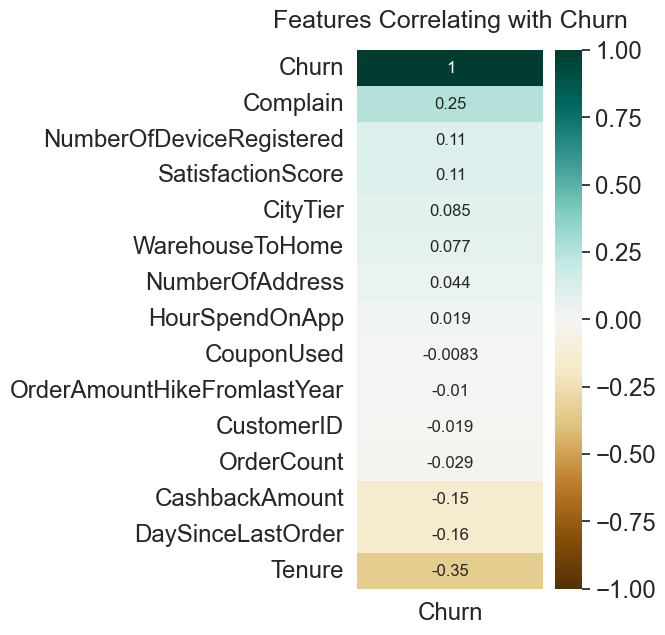

In [310]:
plt.figure(figsize=(3, 7))
heatmap = sns.heatmap(df[nums].corr()[['Churn']].sort_values(by='Churn', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Churn', fontdict={'fontsize':18}, pad=16);

Analisa : 
- 'Tenure' memiliki korelasi negative sedang sebesar -0.35 dengan churn, ini menunjukkan bahwa tenure memiliki korelasi berkebalikan dengan churn. 
- Feature - Feature lain memiliki nilai korelasi yang sangat rendah yakni mendekati nilai 0. hal ini menunjukkan bahwa beberapa Feature yang mendekati nilai 0 tersebut, tidak memiliki korelasi dengan churn. 

Action : 
- Terdapat beberapa Feature penting yang memiliki korelasi nilai sedang (menjauhi nilai 0), beberapa Feature ini dapat dipertahankan untuk dapat dijadikan Feature utama (feature penting) dalam proses training model machine learning. Feature - Feature tersebut seperti Complain, dan Tenure. 
- Feature - Feature yang memiliki korelasi low (mendekati nilai 0) harus dipertimbangkan untuk dibuang atau dipertahankan, karena beberapa Feature tersebut bisa jadi memiliki informasi penting yang unik yang berguna untuk bahan pembelajaran model machine learning yang digunakan.  

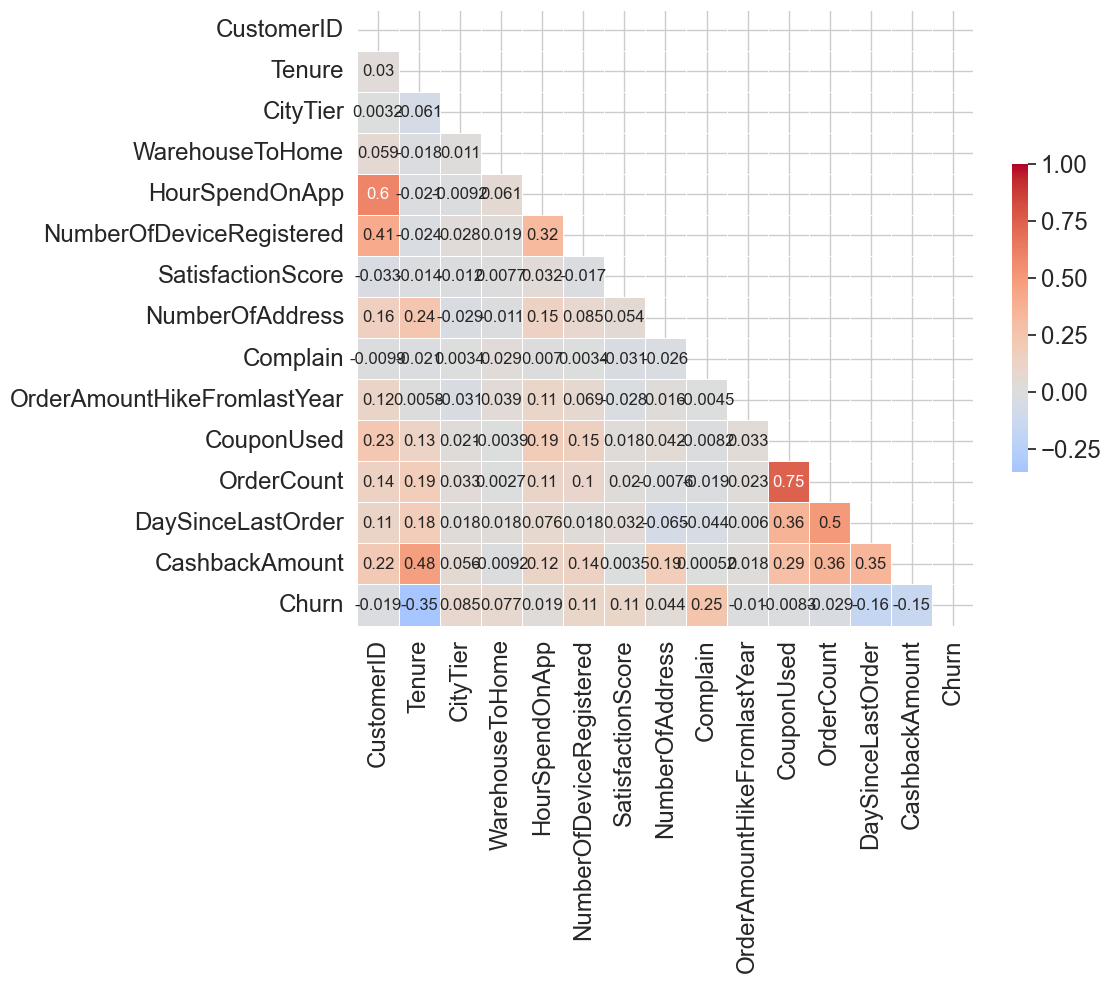

In [311]:
# Compute the correlation matrix
corr = df[nums].corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()


Analisa : 
- Terdapat dua Feature yang memiliki korelasi positif cukup tinggi yakni Feature CouponUsed dengan Feature OrderCount yang memiliki nilai sebesar 0.75
- Terdapat juga dua Feature yang saling berkolerasi positif sedang dengan nilai 0.5 yakni Feature OrderCount dengan Feature DaySinceLastOrder. selian itu Feature Tenure dengan CashbackAmount juga memiliki korelasi positif sedang dengan nilai 0.48
- Terdapat banyak Feature yang memiliki nilai korelasi low (nilainya mendekati 0) dalam hal ini secara umum dapat dikatakan bagus karena mungkin beberapa Feature tersebut dapat memberikan informasi - informasi yang unik untuk model machine learning yang akan digunakan. 

Action : 
- Mempertahankan beberapa fitur yang memiliki nilai korelasi yang tinggi seperti CouponUsed dengan OrderCount
- Mempertimbangkan membuang fitur CustomerID, walaupun CustomerID memiliki nilai korelasi yang tinggi dengan HourSpendOnApp yakni sebesar 0.6 fitur ini masih akan dipertimbangkan untuk dibuang karena diyakini tidak memiliki hubungan antara keduanya. 
- Mempertimbangkan beberapa fitur seperti CouponUsed dengan OrderCount yang memiliki korelasi cukup tinggi, dipertimbangkan untuk menggabungkan kedua Feature tersebut menjadi satu fitur atau membuang salah satu Feature. 

# 4. Business Insight

Selain EDA, lakukan juga beberapa analisis dan visualisasi untuk menemukan suatu
business insight. Tuliskan minimal 3 insight, dan berdasarkan insight tersebut jelaskan
rekomendasinya untuk bisnis.

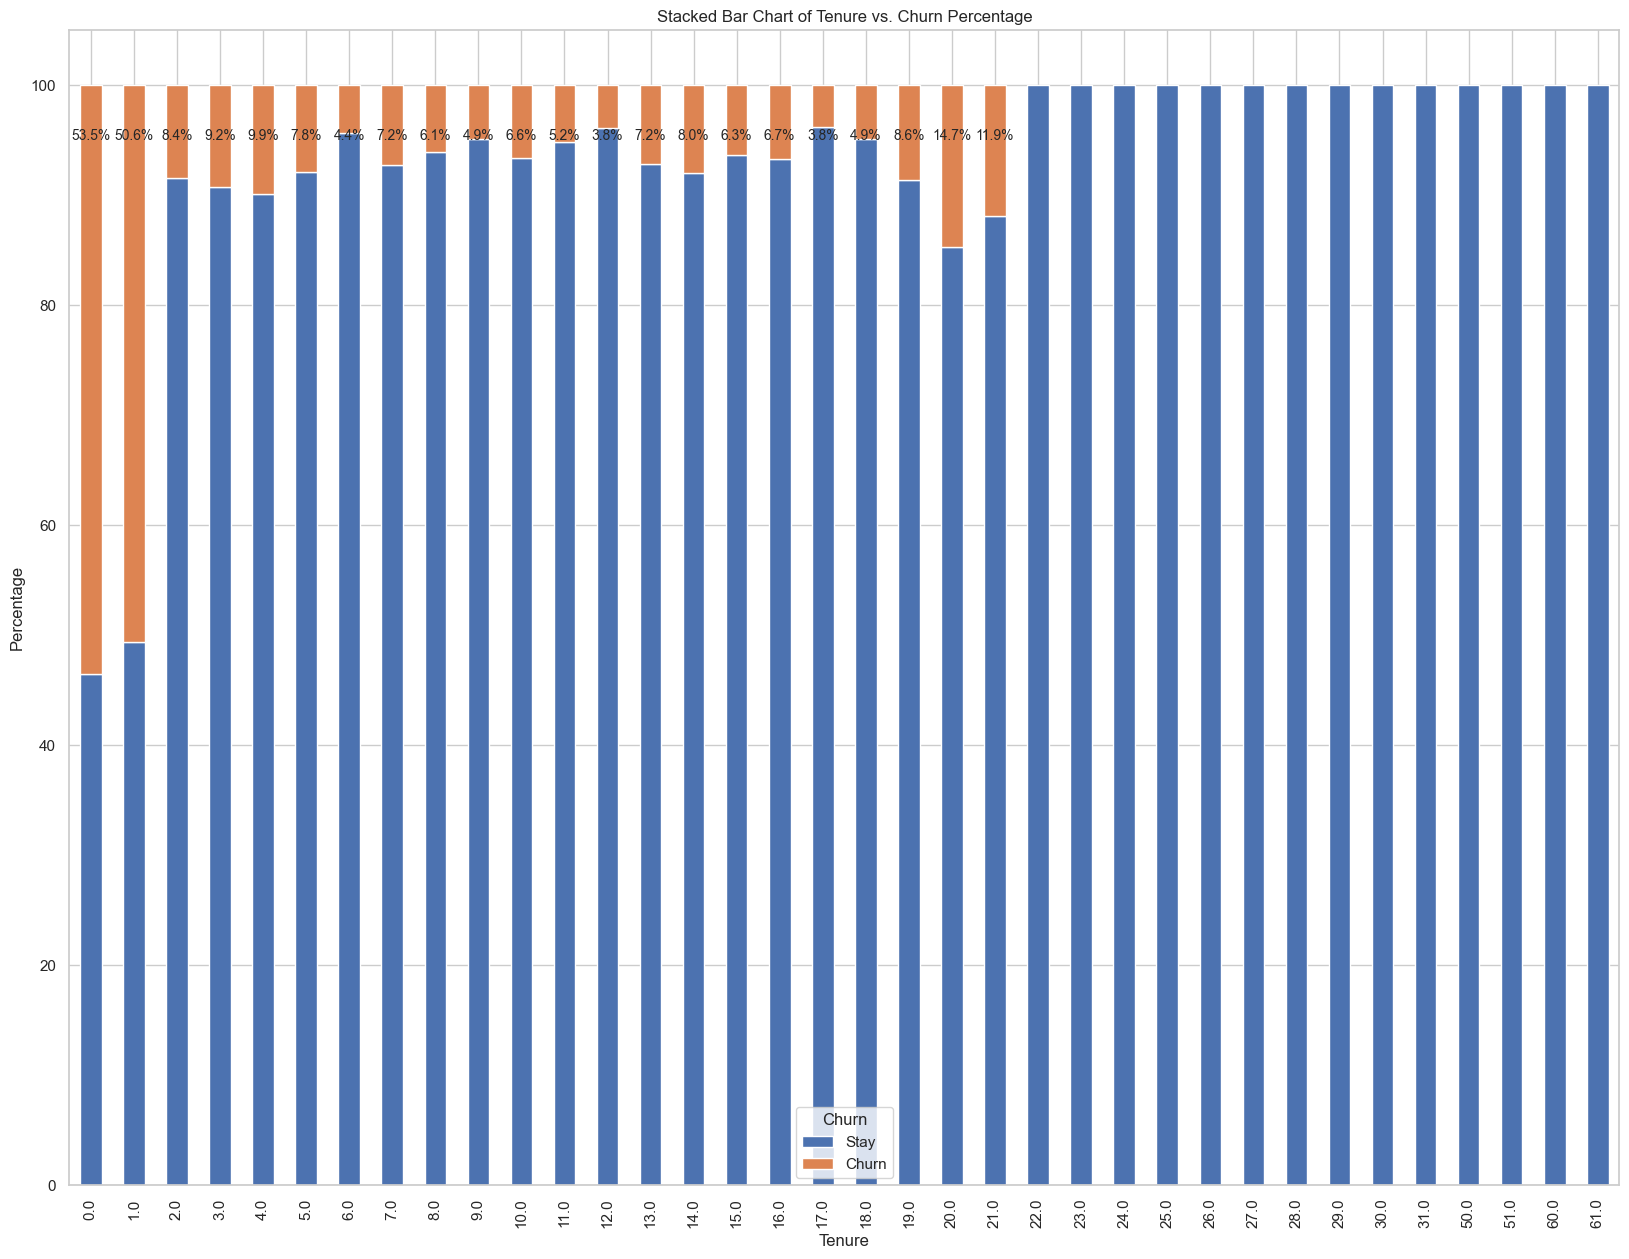

In [312]:
# Hitung persentase Churn dan Stay di setiap Tenure
tenure_churn_counts = df.groupby(['Tenure', 'Churn']).size().unstack()
tenure_churn_percentage = (tenure_churn_counts.div(tenure_churn_counts.sum(axis=1), axis=0) * 100)

# Gunakan Seaborn untuk membuat grafik batang bertumpuk dengan persentase
sns.set(style="whitegrid")
ax = tenure_churn_percentage.plot(kind='bar', stacked=True, figsize=(20, 15))

plt.xlabel('Tenure')
plt.ylabel('Percentage')
plt.title('Stacked Bar Chart of Tenure vs. Churn Percentage')

# Tambahkan label pada legenda
plt.legend(title='Churn', labels=['Stay', 'Churn'])

# Tambahkan label angka pada setiap bar Churn dengan jarak antara bar
for p in ax.patches[len(tenure_churn_counts):]:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height - 5), ha='center', fontsize=10)

# Tampilkan grafik
plt.show()

### Observation & Insight:
Customer dengan Tenure rendah (kurang dari 2 bulan) memiliki potensi churn jauh lebih tinggi daripada tenure menengah keatas. Terlihat dalam grafik tenure 0-1 bulan memiliki persentase churn yang paling tinggi sebesar 53,5%.Tenure 1-2 bulan memiliki persentase churn yang tinggi juga sebesar 50,6%. Sedangkan Tenure yang lebih dari 2 bulan memiliki sampai 21 bulan memiliki median sekitar 13,9%. Dari grafik juga terlihat customer yang memiliki tenure lebih dari sama dengan 22 bulan tidak ada customer yang Churn

Berikut beberapa rekomendasi bisnis yang dapat membantu Anda memfokuskan upaya untuk menjaga pelanggan yang baru bergabung:

1. Program Onboarding yang Efektif: Buatlah program onboarding yang efektif untuk pelanggan yang baru bergabung, dengan panduan langkah demi langkah yang memudahkan mereka dalam menggunakan aplikasi dan berbelanja. Sediakan bantuan dan dukungan pelanggan yang mudah diakses selama periode onboarding.

2. Penawaran Spesial untuk Tenure Rendah: Berikan penawaran spesial, diskon, atau hadiah kepada pelanggan dengan tenure rendah untuk mendorong mereka berbelanja lebih banyak. Buatlah paket promosi khusus untuk produk-produk yang biasanya dibeli oleh pelanggan baru.

3. Customer Engagement: Fokus pada customer engagement dengan mengirimkan email, notifikasi, atau pesan langsung yang memberikan informasi tentang produk, penawaran khusus, atau rekomendasi berdasarkan perilaku mereka.

4. Program Loyalty: Implementasikan program loyalty yang memberikan insentif kepada pelanggan yang tetap berbelanja dengan Anda. Berikan poin atau diskon tambahan setelah pelanggan mencapai tenure tertentu. Berikan insentif kepada pelanggan yang mereferensikan teman atau keluarga untuk bergabung dengan aplikasi Anda.

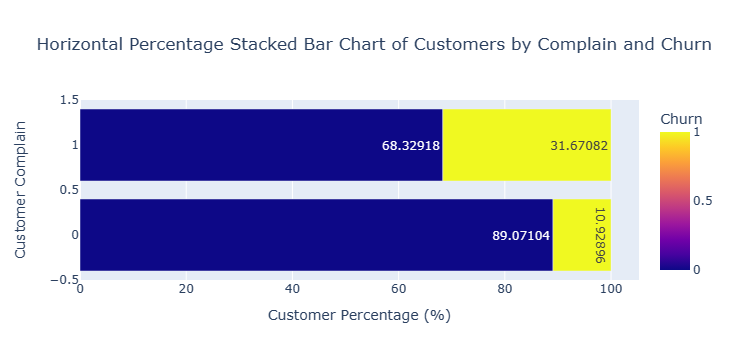

In [313]:
df2 = df.copy()
df2['Complain'].map({0: 'No', 1: 'Yes'})

# Group the data by 'Complain', 'Churn', and count the number of occurrences
grouped_data = df2.groupby(['Complain', 'Churn']).size().reset_index(name='Count')

# Calculate the percentage of customers in each stack
grouped_data['Percentage'] = grouped_data['Count'] / grouped_data.groupby('Complain')['Count'].transform('sum') * 100

# Plot the horizontal percentage stacked bar chart
fig = px.bar(grouped_data, x='Percentage', y='Complain', orientation='h', color='Churn',
             title='Horizontal Percentage Stacked Bar Chart of Customers by Complain and Churn',
             color_discrete_sequence=['#3A506B', '#BA1F33'],
             labels={'Complain': 'Customer Complain', 'Percentage': 'Customer Percentage'})

# Customize the plot
fig.update_layout(barmode='stack')
fig.update_traces(texttemplate='%{value}', textposition='inside')
fig.update_xaxes(title_text='Customer Percentage (%)')
fig.update_yaxes(title_text='Customer Complain')

fig.show()

### Observation & Insight:
Persentase churn akibat customer complain (31.67%) hampir 3 kali lebih besar dari
persentase churn dari total customer yang tidak complain (10.92%)


upaya bisnis Anda pada mengurangi jumlah pelanggan yang mengajukan komplain dengan strategi berikut:
1. Analisis dan Perbaikan Pengalaman Pelanggan: Lakukan survei pelanggan dan analisis lebih lanjut untuk memahami penyebab komplain pelanggan. Identifikasi masalah umum dan tindakan korektif yang diperlukan. Tingkatkan pengalaman pelanggan dengan memastikan website atau aplikasi mudah digunakan, proses pembayaran yang lancar, dan pelayanan pelanggan yang responsif.

2. Pemantauan dan Umpan Balik: Pantau secara rutin umpan balik pelanggan dan komplain yang masuk. Gunakan data ini untuk terus meningkatkan produk dan layanan Anda. Tanggapi komplain dengan cepat dan efisien, dan berikan resolusi yang memuaskan kepada pelanggan.

3. Transparansi dan Komunikasi: Jalin komunikasi terbuka dengan pelanggan. Berikan informasi yang jelas tentang produk, harga, dan kebijakan pengembalian barang. Berikan pembaruan kepada pelanggan jika terjadi keterlambatan pengiriman atau perubahan kebijakan penting lainnya.

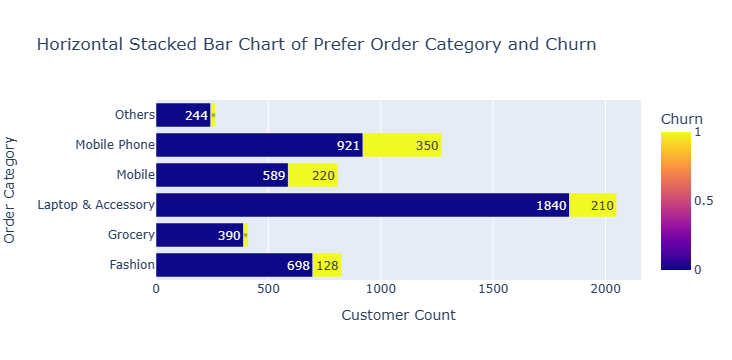

In [314]:
grouped_data = df.groupby(['PreferedOrderCat', 'Churn']).size().reset_index(name='Count')

# Plot the histogram
fig = px.bar(grouped_data, x='Count', y='PreferedOrderCat', orientation='h', color='Churn',
             title='Horizontal Stacked Bar Chart of Prefer Order Category and Churn',
             color_discrete_sequence=['#3A506B', '#BA1F33'],
             labels={'PreferedOrderCat': 'Order Category', 'Count': 'Customer Count'})

# Customize the plot
fig.update_layout(barmode='stack')
fig.update_traces(texttemplate='%{value}', textposition='inside')
fig.update_xaxes(title_text='Customer Count')
fig.update_yaxes(title_text='Order Category')

fig.show()

## Observation & Insight:
Customer yang mengorder kategori Mobile Phone dan Phone cenderung untuk churn,
dengan persentase sebesar 27.53% untuk Mobile Phone dan 27.19% untuk Phone. Jika
dibandingkan dengan customer yang mengorder kategori barang lainnya

Ada beberapa strategi yang dapat membantu Anda mengurangi churn pelanggan di masa yang akan datang:
1. Optimalkan Pengalaman Pelanggan untuk Kategori "Mobile Phone", "Mobile", dan "Laptop & Accessory": Identifikasi masalah yang umum terjadi dalam kategori ini, seperti pengiriman yang lambat, kualitas produk yang rendah, atau pelayanan pelanggan yang kurang baik. Tingkatkan pengalaman pelanggan dengan memastikan produk dalam kategori ini berkualitas tinggi, pelayanan pelanggan yang responsif, dan proses pengiriman yang cepat.

2. Tawarkan Promosi Khusus untuk Kategori "Grocery" dan "Others": Meskipun kategori "Grocery" dan "Others" memiliki tingkat churn yang rendah, Anda dapat mempertimbangkan untuk menawarkan promosi khusus, diskon, atau insentif kepada pelanggan yang membeli produk dalam kategori ini. Ini dapat meningkatkan loyalitas pelanggan.

# STAGE 2 DATA PRE-PROCESSING

In [315]:
df.head(5)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [316]:
df.loc[df['PreferredLoginDevice'] == 'Phone', 'PreferredLoginDevice' ] = 'Mobile Phone'
df.loc[df['PreferedOrderCat'] == 'Mobile', 'PreferedOrderCat' ] = 'Mobile Phone'

Direname jadi satu variabel dikarenakan sama phone dengan mobile phone untuk kategori logindevice dan ordercat

In [317]:
df.loc[df['PreferredPaymentMode'] == 'COD', 'PreferredPaymentMode' ] = 'Cash on Delivery'   # uses loc function
df.loc[df['PreferredPaymentMode'] == 'CC', 'PreferredPaymentMode' ] = 'Credit Card'

Dikarenakan makna cod dengan cc adalah Cash on Delivery dan Credit Card, jadi direname variabelnya

In [318]:
df['PreferredPaymentMode'].unique()

array(['Debit Card', 'UPI', 'Credit Card', 'Cash on Delivery', 'E wallet'],
      dtype=object)

# 1. Data Cleansing

### A. Handling Missing Values

In [319]:
# melihat presentase missing value pada data 
missing_value = pd.DataFrame(df.isna().sum(), columns = ['Missing Values'])
missing_value['% Missing Values'] = df.isna().sum() / len(df)*100
missing_value = missing_value[missing_value['% Missing Values'] > 0]
missing_value

,Missing Values,% Missing Values
Tenure,264,4.689165
WarehouseToHome,251,4.458259
HourSpendOnApp,255,4.529307
OrderAmountHikeFromlastYear,265,4.706927
CouponUsed,256,4.547069
OrderCount,258,4.582593
DaySinceLastOrder,307,5.452931


In [320]:
x = sum(missing_value['% Missing Values'])
print((f'Total persentase missing value: {x:.2f}%'))

Total persentase missing value: 32.97%


Karena presentase missing value setiap kategori besar dan jika di drop data menjadi kehilangan sekitar 32% rows. Maka missing value tidak bisa di drop. Langkah selanjutnya yang digunakan adalah imputasi

<Axes: >

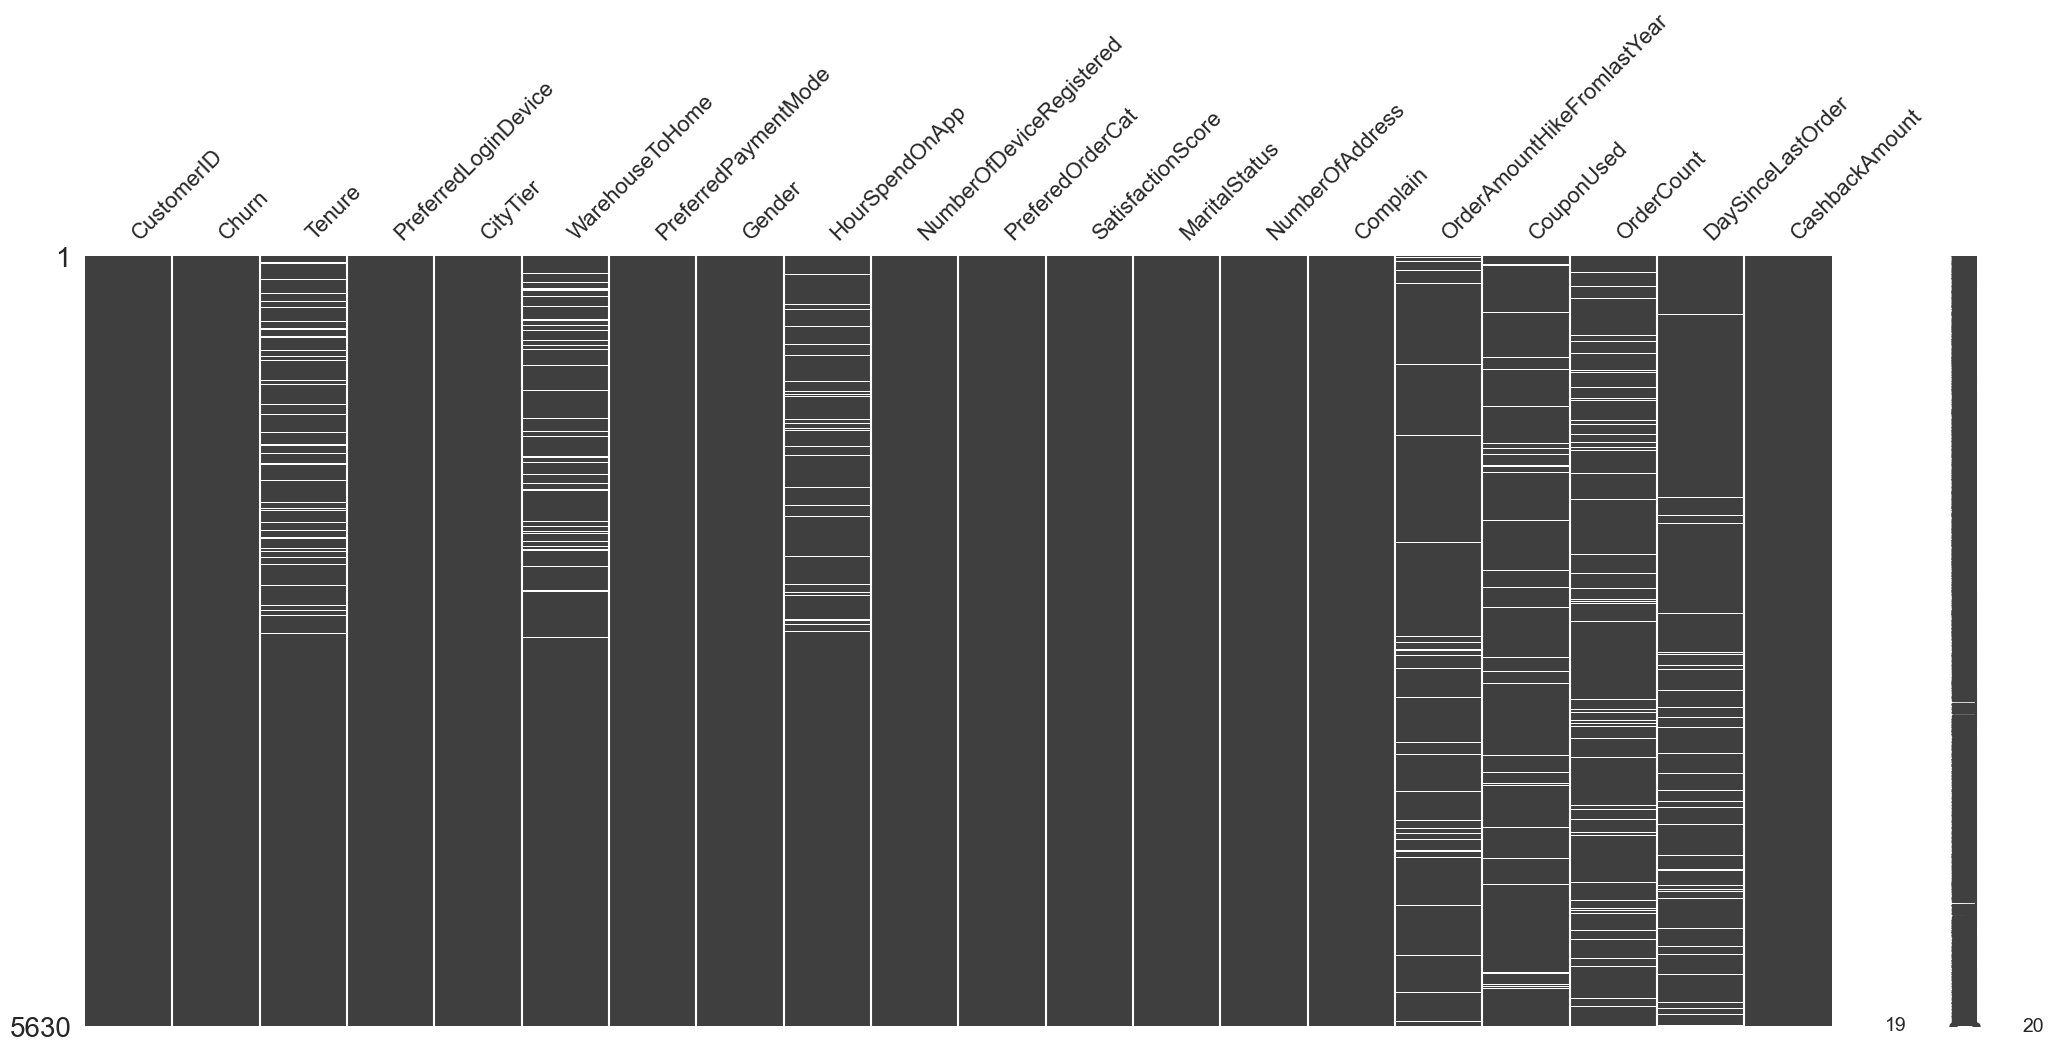

In [321]:
msno.matrix(df)

<Axes: >

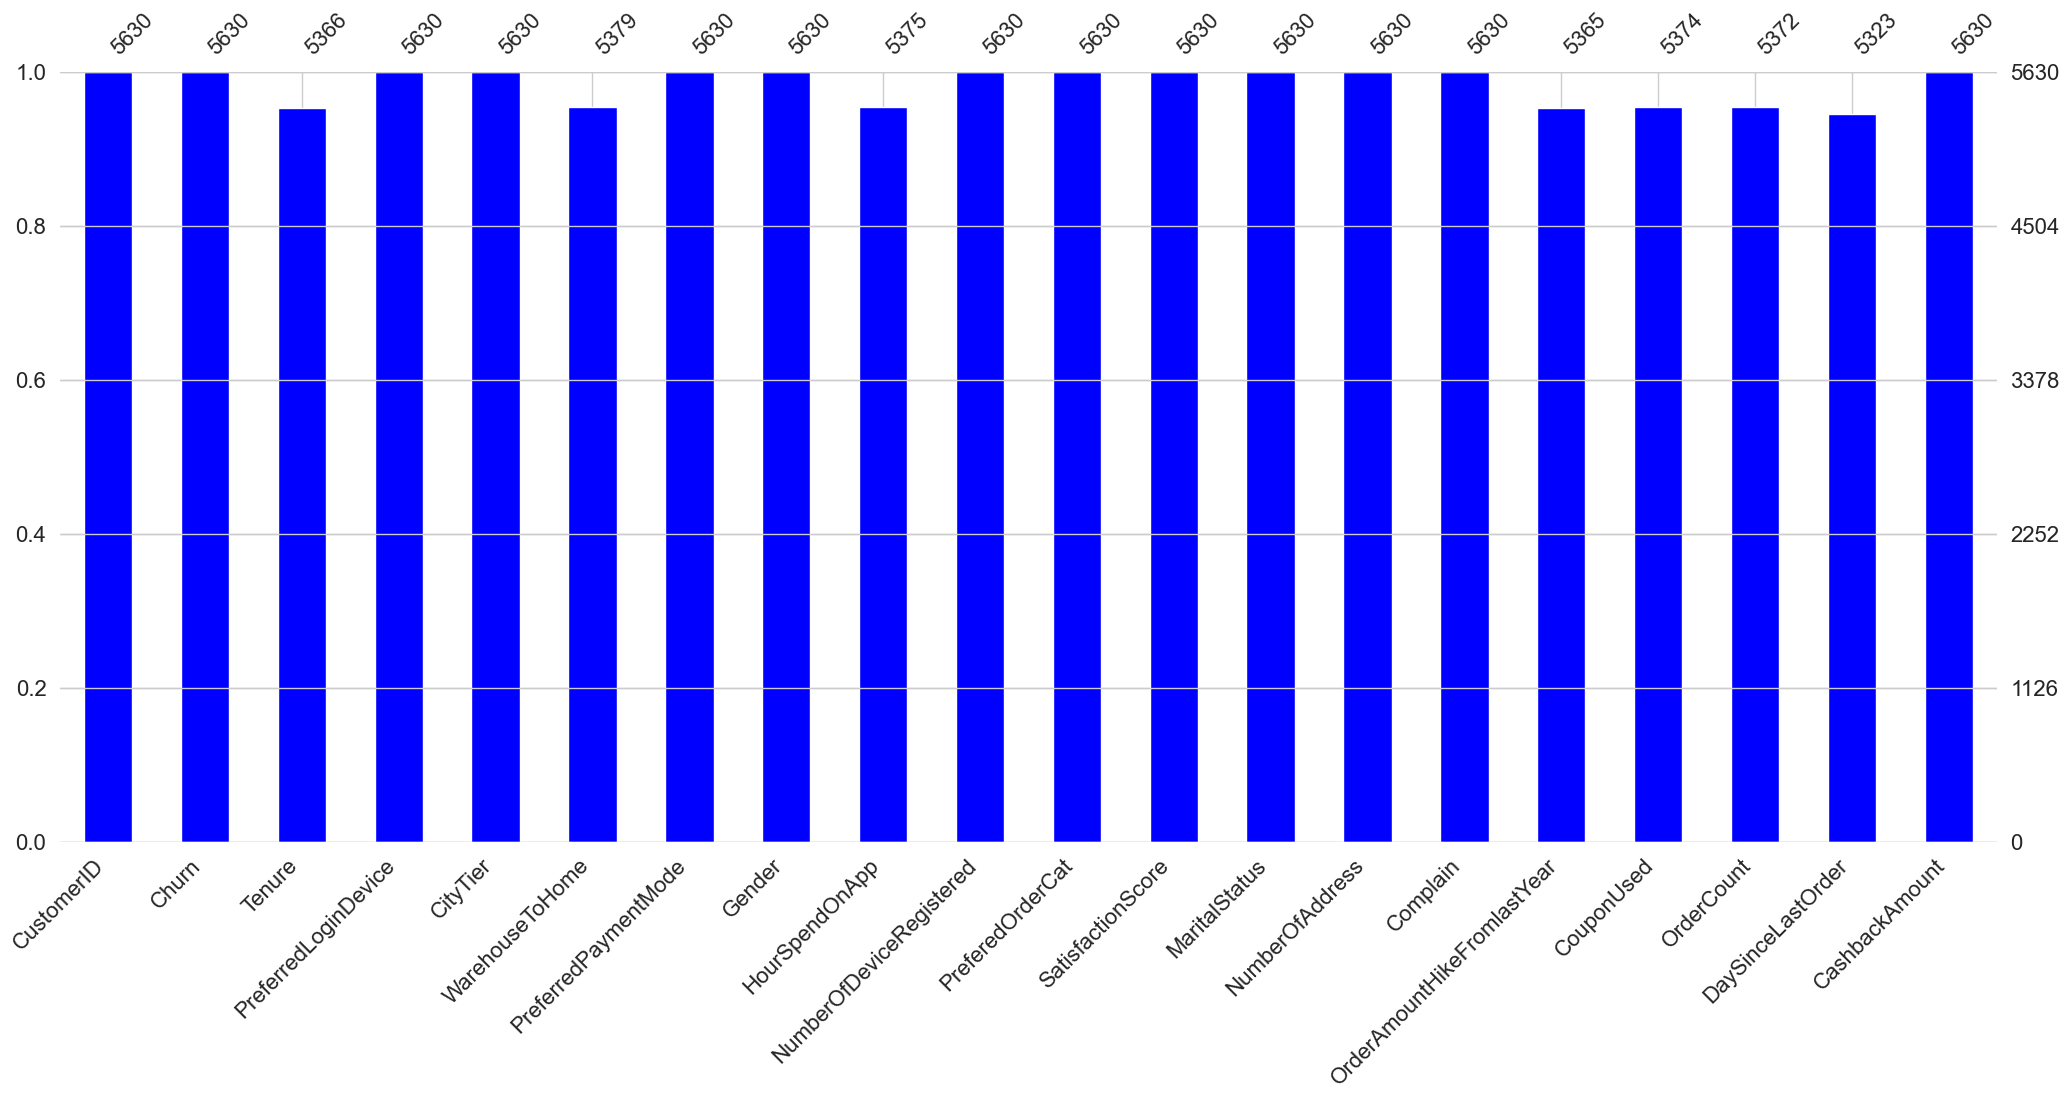

In [322]:
msno.bar(df, color='blue')

In [323]:
#memisahkan data tipe Kontinu(Interval)
kontinu_interval  = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'NumberOfAddress',
                     'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

In [324]:
#memisahkan data tipe Kontinu(Interval)
kontinu_interval  = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'NumberOfAddress',
                     'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

Sebelum di impute

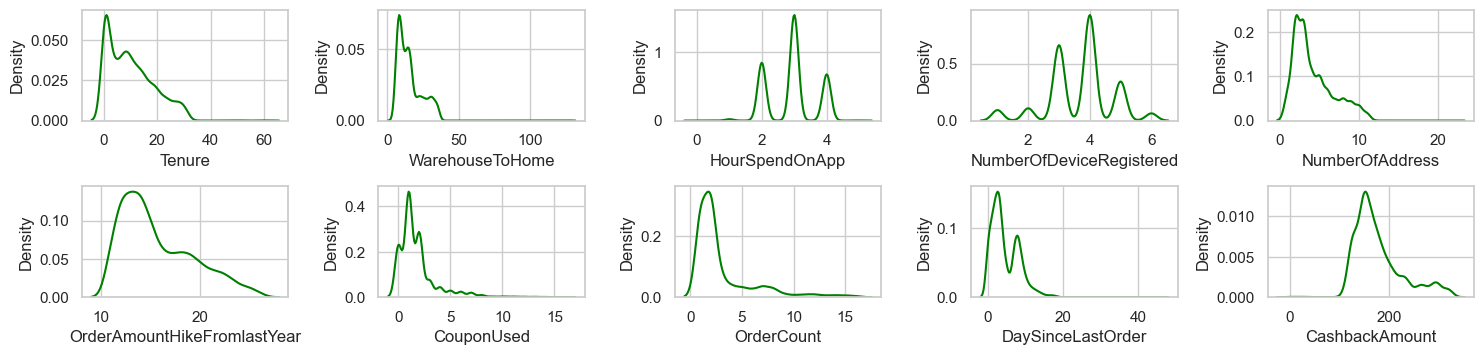

In [325]:
plt.figure(figsize=(15, 5))
for i in range(0, len(kontinu_interval)):
    plt.subplot(3, 5, i+1)
    sns.kdeplot(x=df[kontinu_interval[i]], color='green')
    plt.xlabel(kontinu_interval[i])
    plt.tight_layout()
plt.show()

In [326]:
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [327]:
# impute missing value
df['Tenure'].fillna(df['Tenure'].median(), inplace=True)
df['WarehouseToHome'].fillna(df['WarehouseToHome'].median(), inplace=True)
df['HourSpendOnApp'].fillna(df['HourSpendOnApp'].median(), inplace=True)
df['OrderAmountHikeFromlastYear'].fillna(df['OrderAmountHikeFromlastYear'].median(), inplace=True)
df['CouponUsed'].fillna(df['CouponUsed'].median(), inplace=True)
df['OrderCount'].fillna(df['OrderCount'].median(), inplace=True)
df['DaySinceLastOrder'].fillna(df['DaySinceLastOrder'].median(), inplace=True)

Berdasarkan pengamatan diatas. Berikut adalah strategi kita mengatasi missing values pada setiap kolom. 

* `Tenure` \: impute dengan nilai median (dari `df.describe` kita tau distribusinya skewed)
* `WarehouseToHome` \: impute dengan nilai median (dari `df.describe` kita tau distribusinya skewed)
* `HourSpendOnApp` \: impute dengan nilai modus (karena merupakan data dengan jenis kategorik numerik)
* `OrderAmountHikeFromlastYear` \: impute dengan nilai median (dari `df.describe` kita tau distribusinya skewed)
* `CouponUsed` \: impute dengan nilai median (dari `df.describe` kita tau distribusinya skewed)
* `OrderCount` \: impute dengan nilai median (dari `df.describe` kita tau distribusinya skewed)
* `DaySinceLastOrder` \: impute dengan nilai median (dari `df.describe` kita tau distribusinya skewed)

In [328]:
df.isnull().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

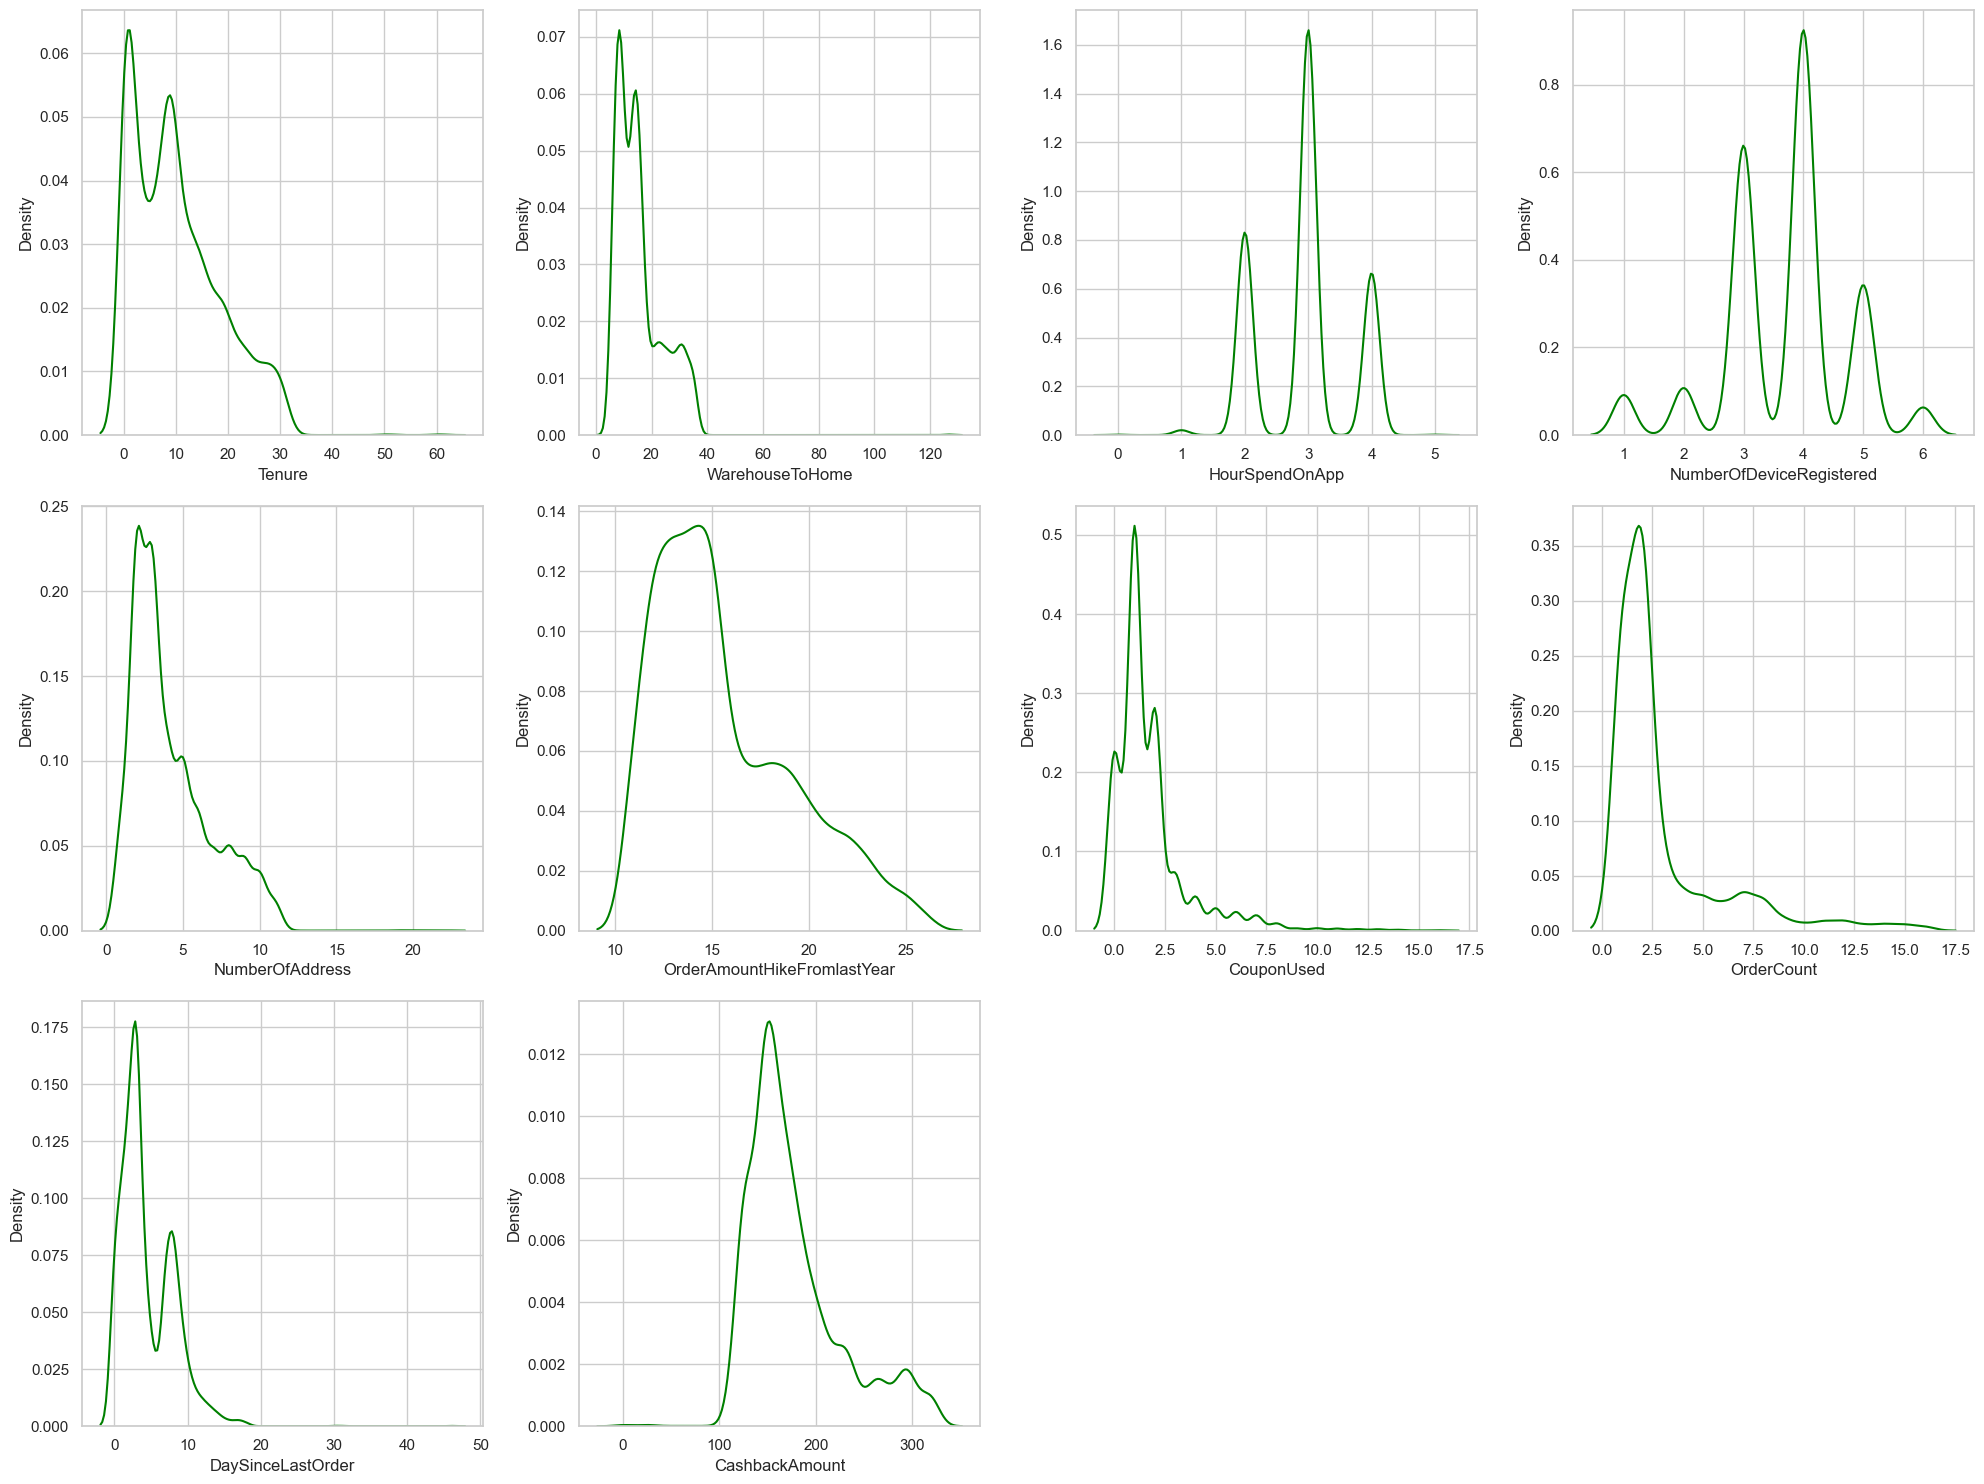

In [329]:
plt.figure(figsize=(20, 15))
for i in range(0, len(kontinu_interval)):
    plt.subplot(3, 4, i+1)
    sns.kdeplot(x=df[kontinu_interval[i]], color='green')
    plt.xlabel(kontinu_interval[i])
    plt.tight_layout()
plt.show()

In [330]:
# cek jumlah missing data setelah preprocessing
df.isna().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

In [331]:
df.head(5)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,9.0,Mobile Phone,1,8.0,UPI,Male,3.0,4,Mobile Phone,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,9.0,Mobile Phone,1,30.0,Debit Card,Male,2.0,4,Mobile Phone,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Mobile Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Mobile Phone,1,12.0,Credit Card,Male,3.0,3,Mobile Phone,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


### B. Handle Duplicated Data

In [332]:
df.duplicated().sum()

0

### C. Handle outliers

In [333]:
df.dtypes

CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

In [334]:
df.head(5)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,9.0,Mobile Phone,1,8.0,UPI,Male,3.0,4,Mobile Phone,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,9.0,Mobile Phone,1,30.0,Debit Card,Male,2.0,4,Mobile Phone,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Mobile Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Mobile Phone,1,12.0,Credit Card,Male,3.0,3,Mobile Phone,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


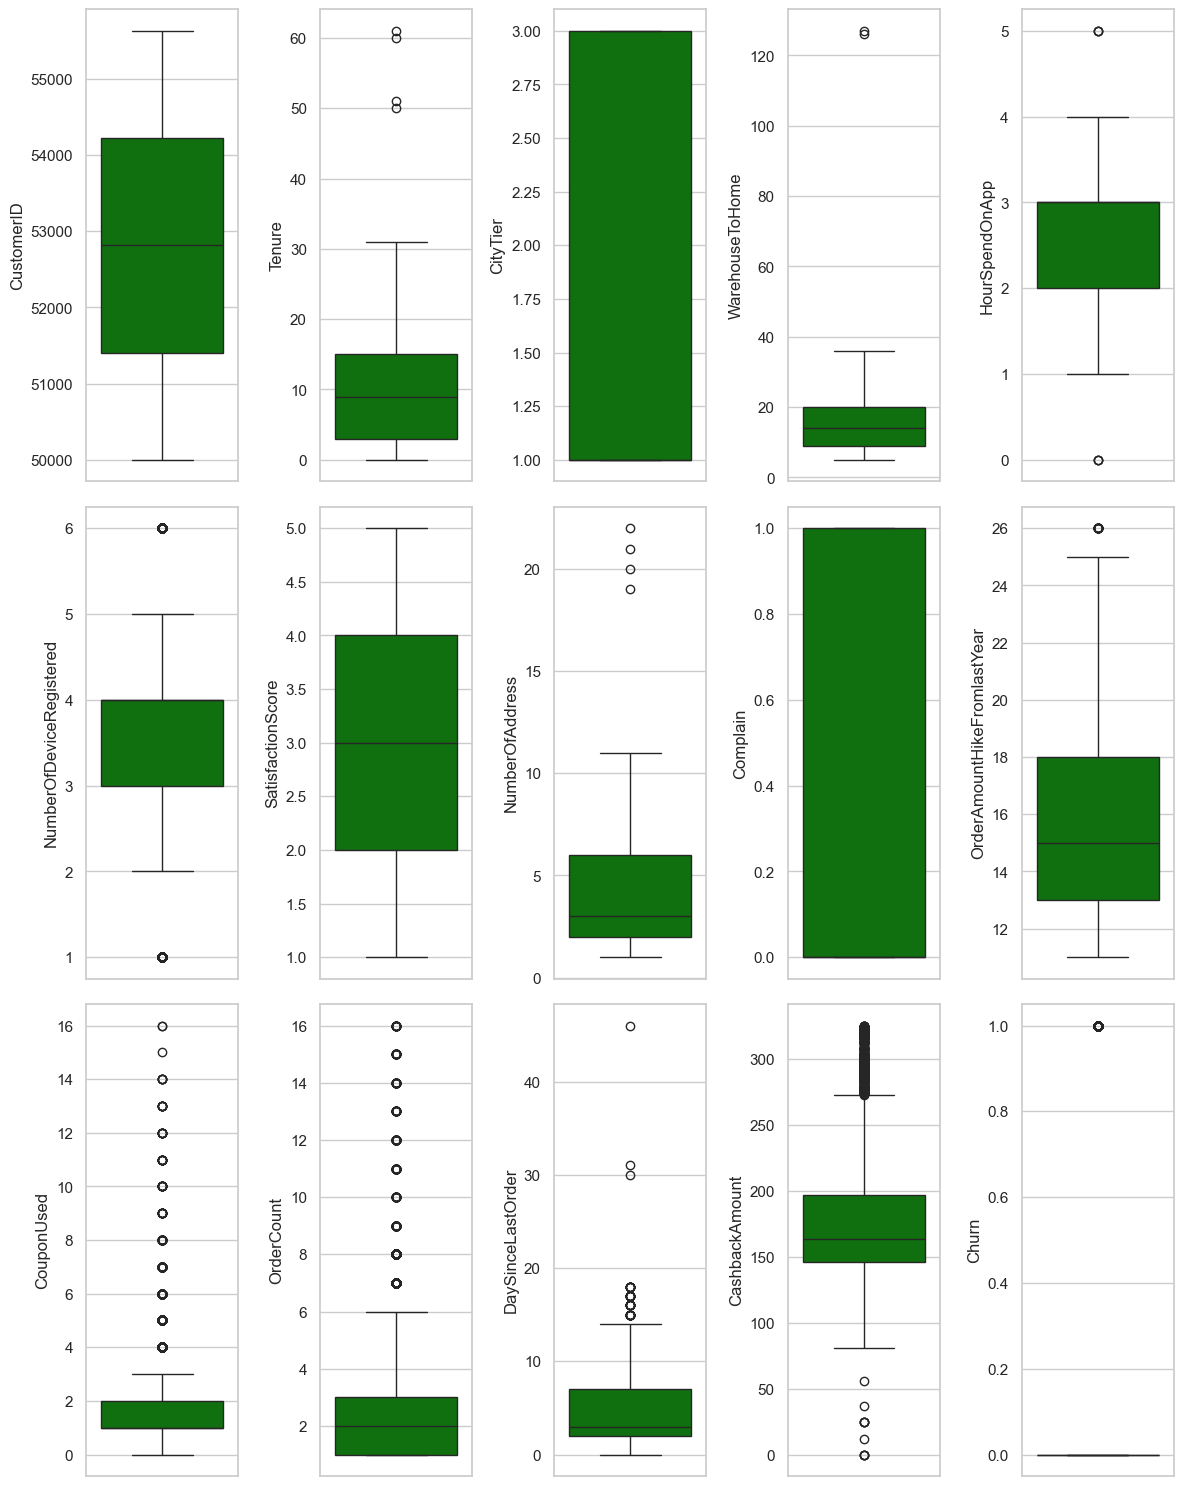

In [335]:
plt.figure(figsize=(12, 20))
for i in range(0, len(nums)):
    plt.subplot(4, int(len(nums)/3), i+1)
    sns.boxplot(y=df[nums[i]], color='green', orient='v')
    plt.tight_layout()
plt.show()

In [336]:
df.sample(5)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
515,50516,0,0.0,Computer,1,10.0,Debit Card,Male,3.0,4,Mobile Phone,2,Divorced,1,0,17.0,0.0,3.0,4.0,131.62
3737,53738,0,7.0,Computer,3,14.0,Credit Card,Male,3.0,4,Laptop & Accessory,5,Divorced,2,0,15.0,1.0,2.0,4.0,168.73
3605,53606,1,1.0,Computer,1,17.0,Debit Card,Female,3.0,5,Mobile Phone,3,Single,3,0,21.0,3.0,3.0,3.0,151.25
1148,51149,1,0.0,Mobile Phone,1,14.0,Credit Card,Female,3.0,3,Mobile Phone,5,Married,2,1,17.0,0.0,1.0,0.0,123.98
2209,52210,1,9.0,Computer,1,11.0,Debit Card,Male,3.0,4,Mobile Phone,5,Married,7,0,17.0,0.0,1.0,0.0,121.07


In [337]:
from scipy import stats

print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))
columns_exclude = nums[:-1]

for col in columns_exclude:
    zscore = abs(stats.zscore(df[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
df = df[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 5630
Jumlah baris setelah memfilter outlier: 5350


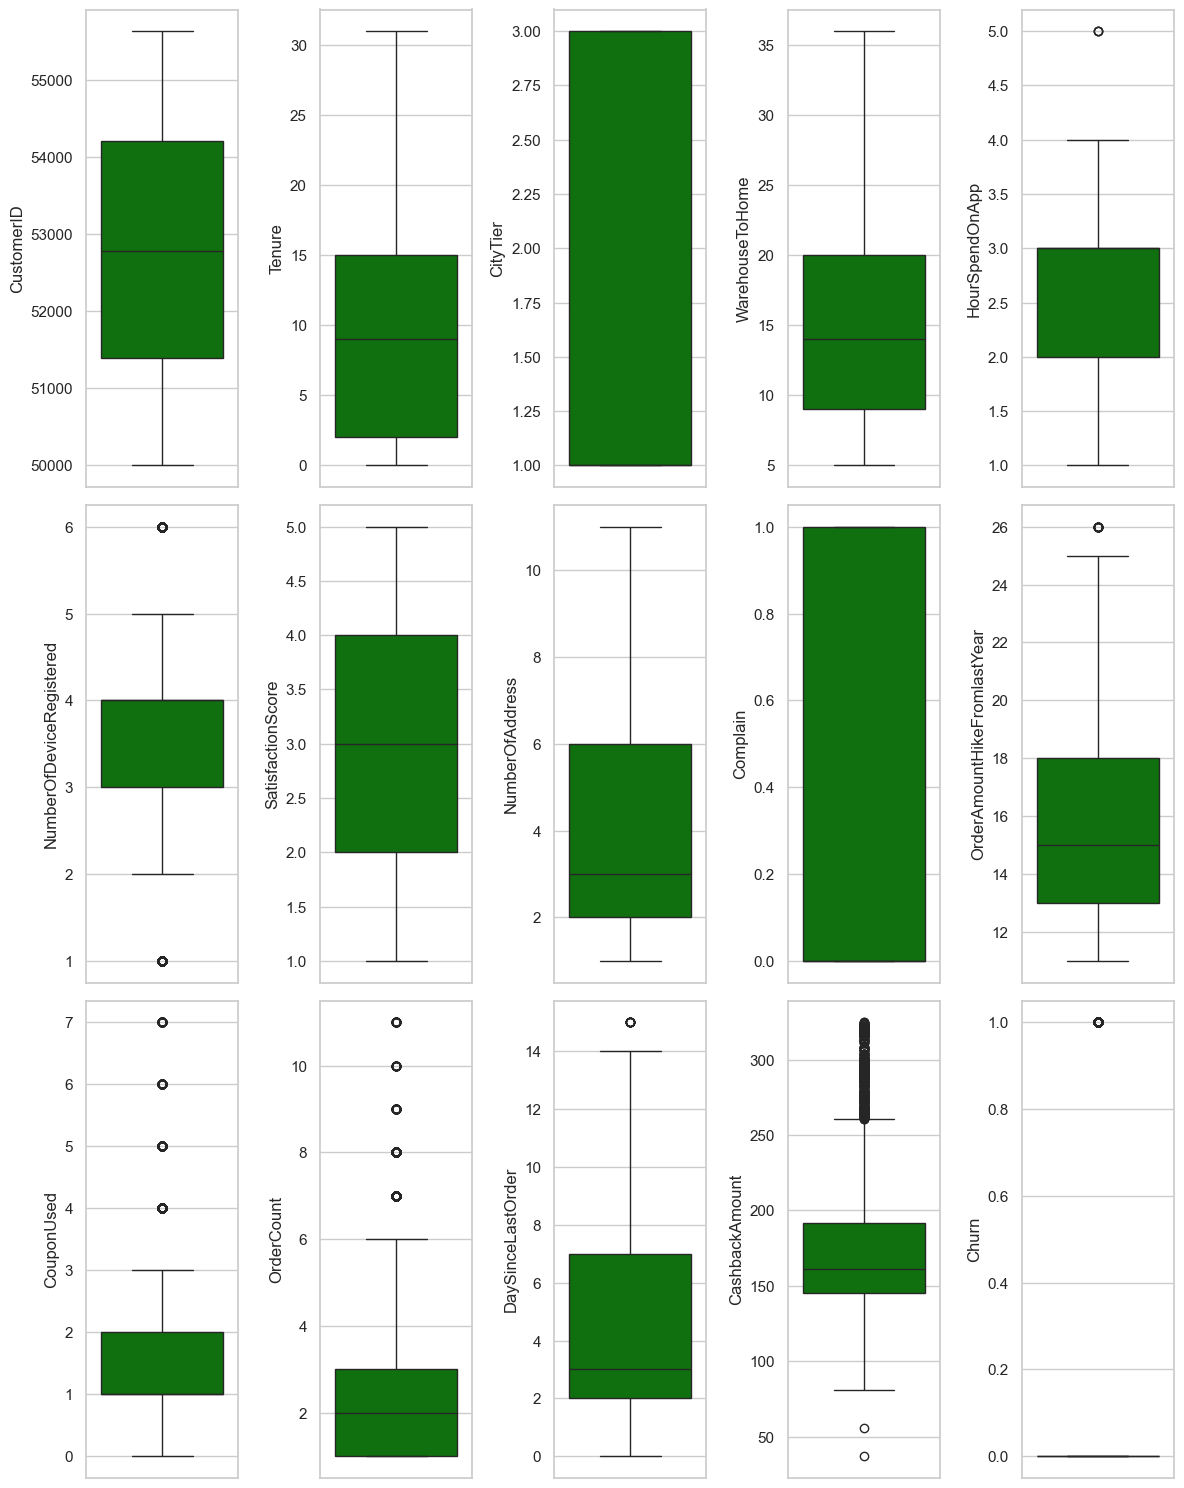

In [338]:
plt.figure(figsize=(12, 20))
for i in range(0, len(nums)):
    plt.subplot(4, int(len(nums)/3), i+1)
    sns.boxplot(y=df[nums[i]], color='green', orient='v')
    plt.tight_layout()
plt.show()

### D. Features Transformations

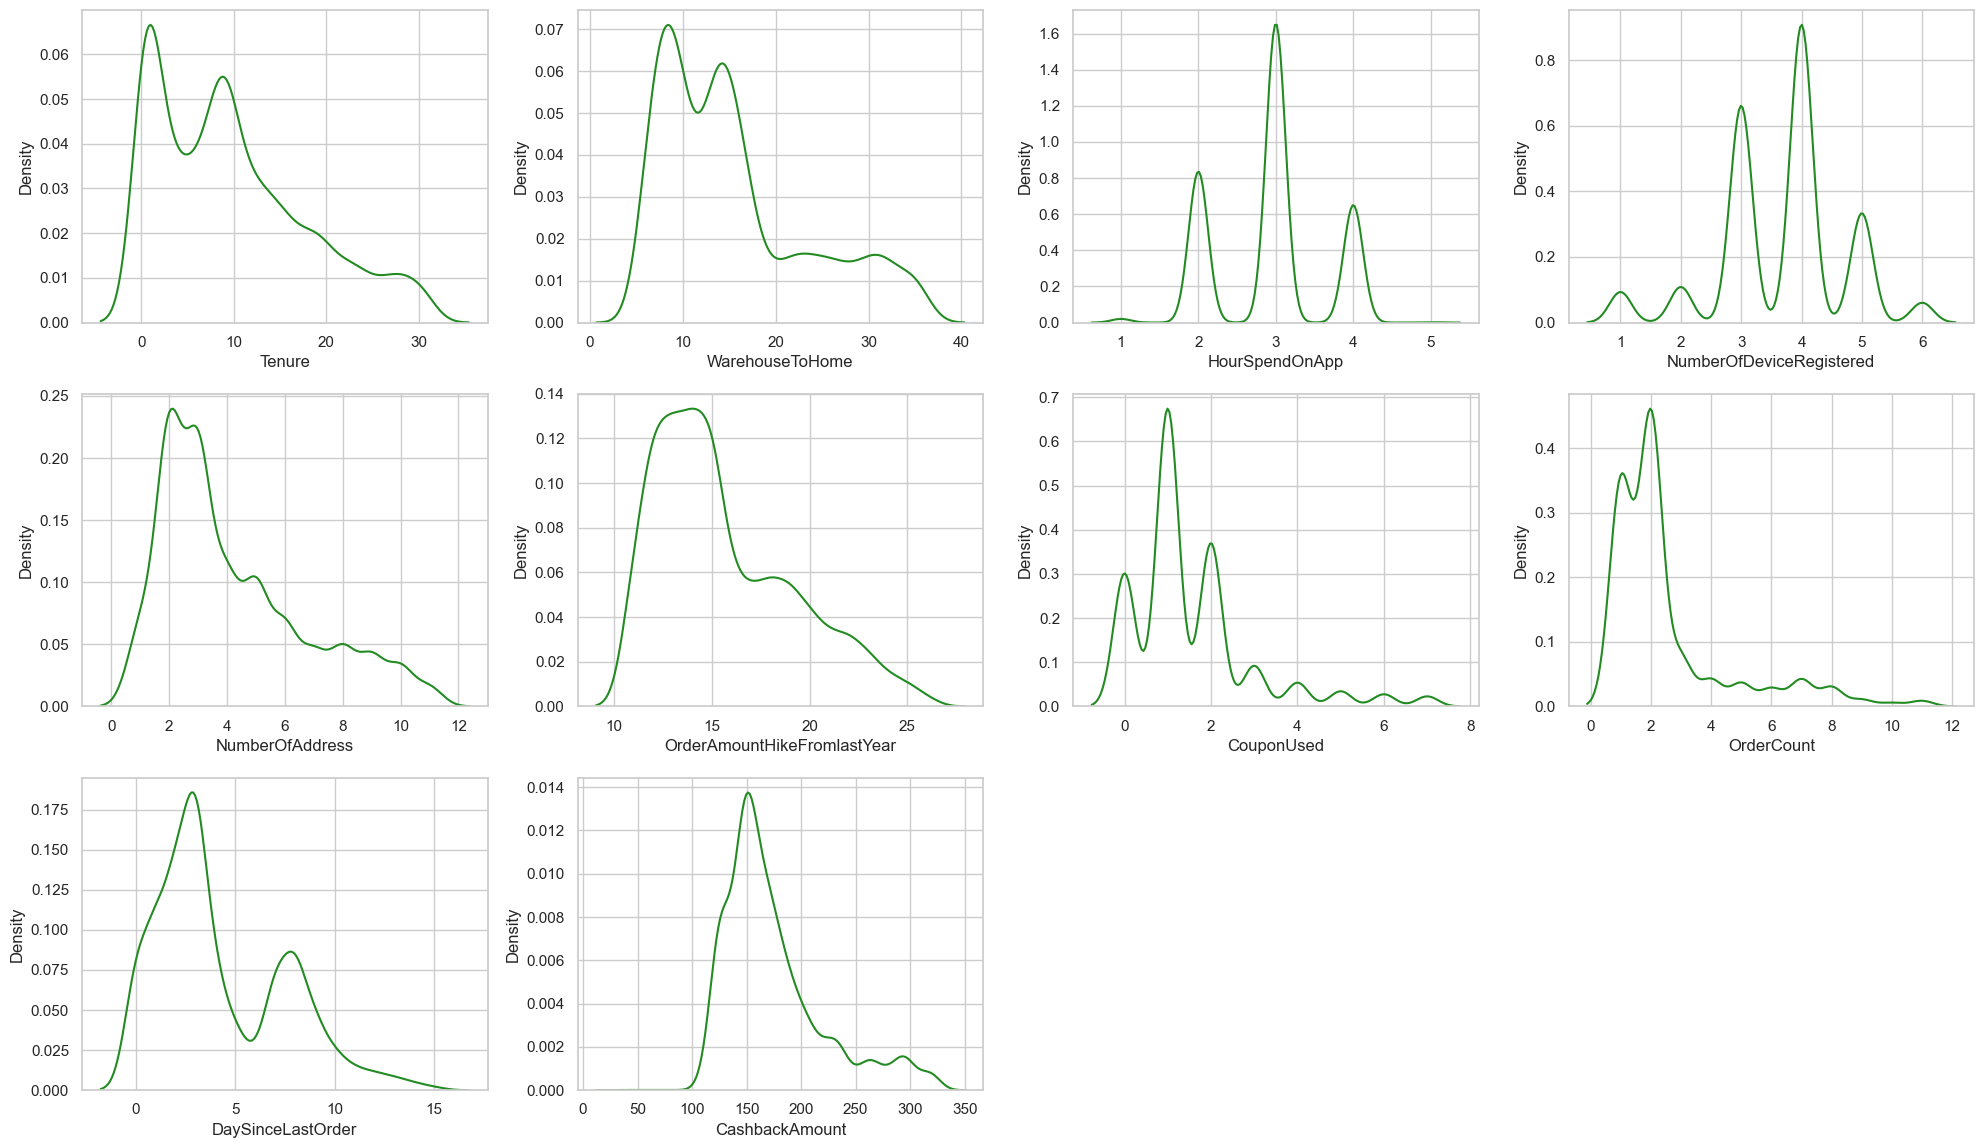

In [339]:
#Melihat behavior dari setiap fitur setelah dilakukan inputation
features = kontinu_interval
plt.figure(figsize=(20, 15))
for i in range(0, len(features)):
  plt.subplot(4, 4, i+1)
  sns.kdeplot(x=df[features[i]], color='forestgreen')
  plt.xlabel(features[i])
  plt.tight_layout()

In [340]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,5350.0,52802.826168,1627.280475,50001.0,51394.25,52784.50,54208.75,55630.00
Churn,5350.0,0.170467,0.376078,0.0,0.00,0.00,0.00,1.00
Tenure,5350.0,9.804112,8.178609,0.0,2.00,9.00,15.00,31.00
CityTier,5350.0,1.652710,0.913816,1.0,1.00,1.00,3.00,3.00
WarehouseToHome,5350.0,15.541308,8.066006,5.0,9.00,14.00,20.00,36.00
HourSpendOnApp,5350.0,2.929720,0.701942,1.0,2.00,3.00,3.00,5.00
NumberOfDeviceRegistered,5350.0,3.675140,1.026057,1.0,3.00,4.00,4.00,6.00
SatisfactionScore,5350.0,3.056449,1.378802,1.0,2.00,3.00,4.00,5.00
NumberOfAddress,5350.0,4.196449,2.544520,1.0,2.00,3.00,6.00,11.00
Complain,5350.0,0.286355,0.452100,0.0,0.00,0.00,1.00,1.00


In [341]:
#Transformation dengan np.log

#df['WarehouseToHome'] = np.log(df['WarehouseToHome'])
#df['NumberOfDeviceRegistered'] = np.log(df['NumberOfDeviceRegistered'])
#df['NumberOfAddress'] = np.log(df['NumberOfAddress'])
#df['OrderAmountHikeFromlastYear'] = np.log(df['OrderAmountHikeFromlastYear'])
#df['CouponUsed'] = np.log(df['CouponUsed'] + 1)
#df['OrderCount'] = np.log(df['OrderCount'])
#df['CashbackAmount'] = np.log(df['CashbackAmount'])

In [342]:
#df.describe().T

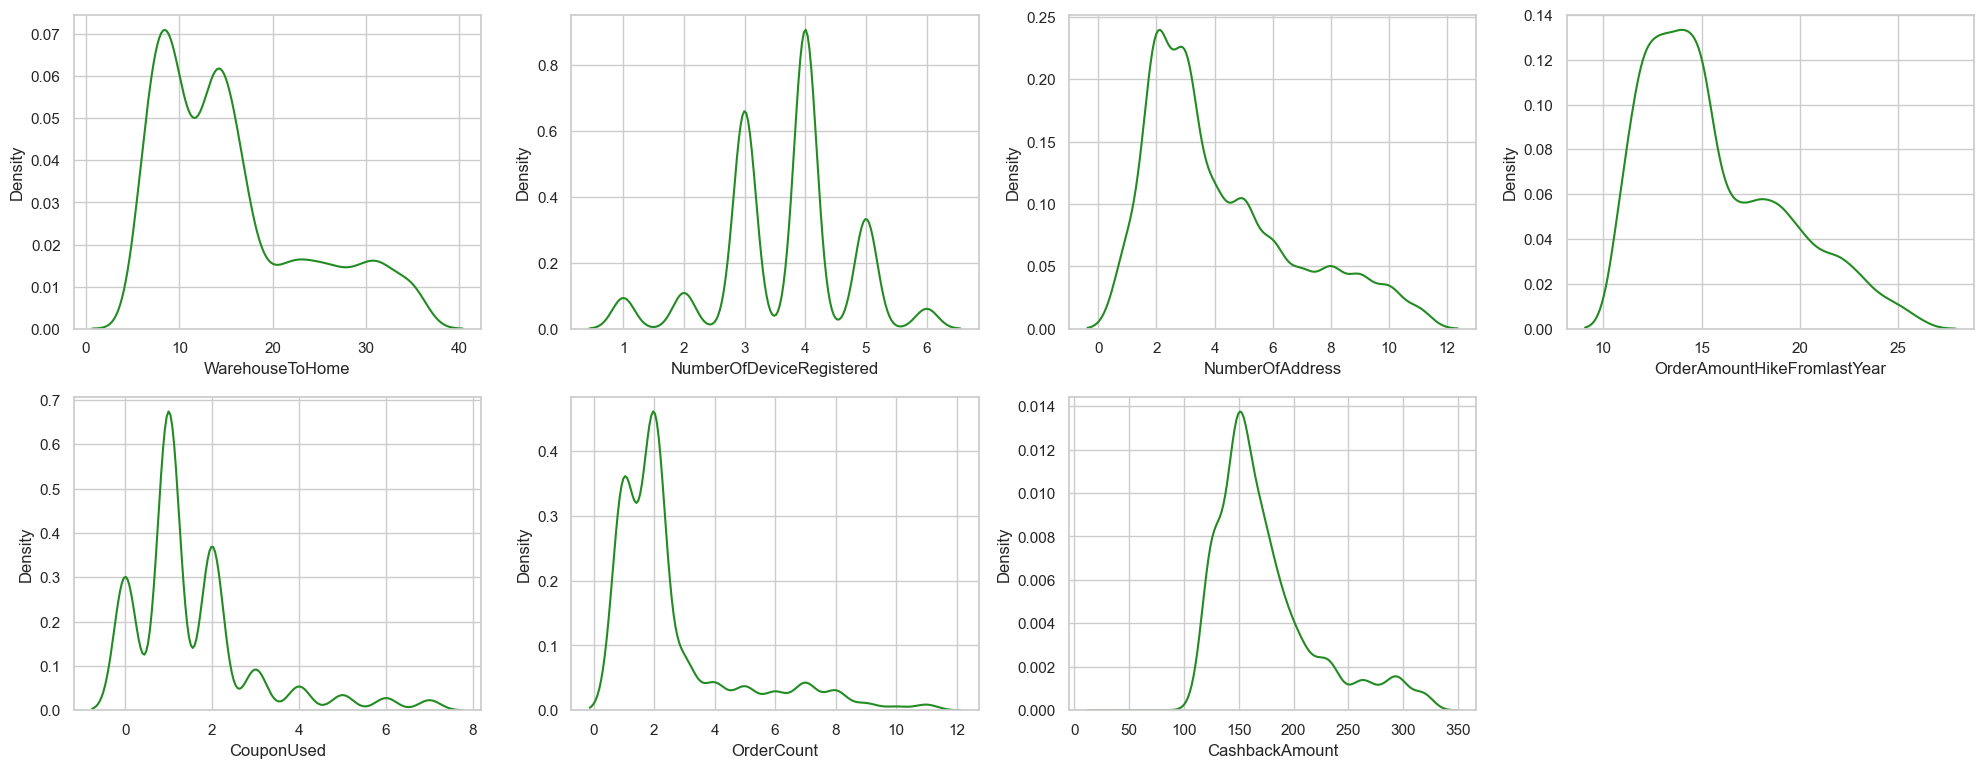

In [343]:
#Melihat behavior dari setiap fitur setelah dilakukan transformation
Transformation = ['WarehouseToHome', 
                  'NumberOfDeviceRegistered', 
                  'NumberOfAddress',
                  'OrderAmountHikeFromlastYear',
                  'CouponUsed', 
                  'OrderCount',
                  'CashbackAmount']
plt.figure(figsize=(20, 15))
for i in range(0, len(Transformation)):
  plt.subplot(4, 4, i+1)
  sns.kdeplot(x=df[Transformation[i]], color='forestgreen')
  plt.xlabel(Transformation[i])
  plt.tight_layout()

### Standarization

In [344]:
df.sample(5)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
132,50133,0,13.0,Mobile Phone,1,8.0,Credit Card,Male,2.0,3,Others,3,Married,1,0,15.0,0.0,3.0,9.0,294.36
5265,55266,0,7.0,Mobile Phone,3,15.0,Debit Card,Male,3.0,4,Laptop & Accessory,5,Married,4,0,14.0,3.0,3.0,3.0,188.92
2708,52709,0,6.0,Mobile Phone,3,16.0,E wallet,Male,2.0,3,Laptop & Accessory,3,Single,2,0,14.0,0.0,1.0,9.0,154.87
1849,51850,1,8.0,Computer,3,32.0,Debit Card,Female,3.0,3,Laptop & Accessory,5,Married,3,0,14.0,0.0,1.0,0.0,142.86
488,50489,0,7.0,Mobile Phone,2,9.0,UPI,Male,2.0,3,Mobile Phone,2,Divorced,1,0,19.0,1.0,1.0,2.0,137.37


In [345]:
# Normalization using MaxminScaler
#from sklearn.preprocessing import MinMaxScaler

#df['Tenure'] = MinMaxScaler().fit_transform(df['Tenure'].values.reshape(len(df), 1))
#df['WarehouseToHome'] = MinMaxScaler().fit_transform(df['WarehouseToHome'].values.reshape(len(df), 1))
#df['HourSpendOnApp'] = MinMaxScaler().fit_transform(df['HourSpendOnApp'].values.reshape(len(df), 1))
#df['NumberOfDeviceRegistered'] = MinMaxScaler().fit_transform(df['NumberOfDeviceRegistered'].values.reshape(len(df), 1))
#df['NumberOfAddress'] = MinMaxScaler().fit_transform(df['NumberOfAddress'].values.reshape(len(df), 1))
#df['OrderAmountHikeFromlastYear'] = MinMaxScaler().fit_transform(df['OrderAmountHikeFromlastYear'].values.reshape(len(df), 1))
#df['CouponUsed'] = MinMaxScaler().fit_transform(df['CouponUsed'].values.reshape(len(df), 1))
#df['OrderCount'] = MinMaxScaler().fit_transform(df['OrderCount'].values.reshape(len(df), 1))
#df['DaySinceLastOrder'] = MinMaxScaler().fit_transform(df['DaySinceLastOrder'].values.reshape(len(df), 1))
#df['CashbackAmount'] = MinMaxScaler().fit_transform(df['CashbackAmount'].values.reshape(len(df), 1))

In [346]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,5350.0,52802.826168,1627.280475,50001.0,51394.25,52784.50,54208.75,55630.00
Churn,5350.0,0.170467,0.376078,0.0,0.00,0.00,0.00,1.00
Tenure,5350.0,9.804112,8.178609,0.0,2.00,9.00,15.00,31.00
CityTier,5350.0,1.652710,0.913816,1.0,1.00,1.00,3.00,3.00
WarehouseToHome,5350.0,15.541308,8.066006,5.0,9.00,14.00,20.00,36.00
HourSpendOnApp,5350.0,2.929720,0.701942,1.0,2.00,3.00,3.00,5.00
NumberOfDeviceRegistered,5350.0,3.675140,1.026057,1.0,3.00,4.00,4.00,6.00
SatisfactionScore,5350.0,3.056449,1.378802,1.0,2.00,3.00,4.00,5.00
NumberOfAddress,5350.0,4.196449,2.544520,1.0,2.00,3.00,6.00,11.00
Complain,5350.0,0.286355,0.452100,0.0,0.00,0.00,1.00,1.00


### E. Feature Encoding

In [347]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5350 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5350 non-null   int64  
 1   Churn                        5350 non-null   int64  
 2   Tenure                       5350 non-null   float64
 3   PreferredLoginDevice         5350 non-null   object 
 4   CityTier                     5350 non-null   int64  
 5   WarehouseToHome              5350 non-null   float64
 6   PreferredPaymentMode         5350 non-null   object 
 7   Gender                       5350 non-null   object 
 8   HourSpendOnApp               5350 non-null   float64
 9   NumberOfDeviceRegistered     5350 non-null   int64  
 10  PreferedOrderCat             5350 non-null   object 
 11  SatisfactionScore            5350 non-null   int64  
 12  MaritalStatus                5350 non-null   object 
 13  NumberOfAddress        

In [348]:
#Buat List Kolom Dengan Tipe Data Object
columns_object = []

for i in df.columns:
    if df[i].dtype == 'object':
        kolom_object = i
        columns_object.append(kolom_object)

#cek isi kolom object
columns_object

['PreferredLoginDevice',
 'PreferredPaymentMode',
 'Gender',
 'PreferedOrderCat',
 'MaritalStatus']

In [349]:
#Lakukan Label Encoder dan One_Hot_Encoding
from sklearn import preprocessing 
  
label_encoder = preprocessing.LabelEncoder()
df['MaritalStatus'] = label_encoder.fit_transform(df['MaritalStatus'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df = pd.get_dummies(df, columns=['PreferredPaymentMode', 'PreferedOrderCat', 'PreferredLoginDevice'], dtype=int)

In [350]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5350 entries, 0 to 5629
Data columns (total 29 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   CustomerID                             5350 non-null   int64  
 1   Churn                                  5350 non-null   int64  
 2   Tenure                                 5350 non-null   float64
 3   CityTier                               5350 non-null   int64  
 4   WarehouseToHome                        5350 non-null   float64
 5   Gender                                 5350 non-null   int32  
 6   HourSpendOnApp                         5350 non-null   float64
 7   NumberOfDeviceRegistered               5350 non-null   int64  
 8   SatisfactionScore                      5350 non-null   int64  
 9   MaritalStatus                          5350 non-null   int32  
 10  NumberOfAddress                        5350 non-null   int64  
 11  Complain 

In [351]:
from sklearn.preprocessing import StandardScaler

#df['Tenure'] = MinMaxScaler().fit_transform(df['Tenure'].values.reshape(len(df), 1))
#df['WarehouseToHome'] = MinMaxScaler().fit_transform(df['WarehouseToHome'].values.reshape(len(df), 1))
#df['HourSpendOnApp'] = MinMaxScaler().fit_transform(df['HourSpendOnApp'].values.reshape(len(df), 1))
#df['NumberOfDeviceRegistered'] = MinMaxScaler().fit_transform(df['NumberOfDeviceRegistered'].values.reshape(len(df), 1))
#df['NumberOfAddress'] = MinMaxScaler().fit_transform(df['NumberOfAddress'].values.reshape(len(df), 1))
#df['OrderAmountHikeFromlastYear'] = MinMaxScaler().fit_transform(df['OrderAmountHikeFromlastYear'].values.reshape(len(df), 1))
#df['CouponUsed'] = MinMaxScaler().fit_transform(df['CouponUsed'].values.reshape(len(df), 1))
#df['OrderCount'] = MinMaxScaler().fit_transform(df['OrderCount'].values.reshape(len(df), 1))
#df['DaySinceLastOrder'] = MinMaxScaler().fit_transform(df['DaySinceLastOrder'].values.reshape(len(df), 1))
#df['CashbackAmount'] = MinMaxScaler().fit_transform(df['CashbackAmount'].values.reshape(len(df), 1))
column = ['Tenure',
          'CityTier',
          'WarehouseToHome',
          'HourSpendOnApp',
          'NumberOfDeviceRegistered',
          'SatisfactionScore',
          'NumberOfAddress', 
          'OrderAmountHikeFromlastYear', 
          'CouponUsed',
          'OrderCount',
          'DaySinceLastOrder',
          'CashbackAmount']

for col in column:
    df[col] = StandardScaler().fit_transform(df[col].values.reshape(len(df),1))

### F. Handle class imbalance

In [352]:
column = []
for col in df.columns:
    if (abs(df['Churn'].corr(df[col])) > 0.05):
        column.append(col)
df_final = df[column]
df_final.sample(3)

,Churn,Tenure,CityTier,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,MaritalStatus,Complain,DaySinceLastOrder,CashbackAmount,PreferredPaymentMode_Cash on Delivery,PreferredPaymentMode_E wallet,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,PreferredLoginDevice_Computer,PreferredLoginDevice_Mobile Phone
1137,1,-0.465173,-0.714335,-0.191105,0.316639,-0.040944,1,1,-1.294154,-1.079183,1,0,0,0,1,0,1,0
4756,0,-0.098328,-0.714335,-1.059026,-1.632752,-0.040944,2,0,-0.376740,-0.527016,0,0,0,0,1,0,0,1
5270,1,-1.076581,-0.714335,-0.811048,0.316639,1.409726,1,1,-0.988349,-0.619868,0,0,0,0,1,0,0,1


In [353]:
#Cek Jumlah Data Target (Y_train)
df_feature = df_final.drop(['Churn'], axis=1)
df_target = df_final['Churn']

target = df_target.value_counts().to_list()
sum_target = int(target[0] + target[1])
percentage_0 = (int(target[0]) / sum_target) * 100
percentage_1 = (int(target[1]) / sum_target) * 100

In [354]:
Y_target = pd.DataFrame({'Churn' : ['Yes', 'No'],
                              'Total' : [target[1], target[0]],
                              'Percentage' : [round(percentage_1, 1), round(percentage_0, 1)]
                              })
Y_target

,Churn,Total,Percentage
0,Yes,912,17.0
1,No,4438,83.0


- Kita akan melakukan Handle class imbalance dengan teknik oversampling, ini dilakukan karena pada data target rasio antara customer churn dengan customer tidak churn adalal 1 : 4,7
- Dalam persentase total Churn Yes = 17.3% dan Churn No = 83%

In [355]:
#Lakukan Teknik Over_sampling dengan SMOTE untuk mengatasi class imbalance 
#from imblearn import over_sampling
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
df_feature, df_target = smote.fit_resample(df_feature, df_target)
#df_feature, df_target = over_sampling.SMOTE(0.33).fit_resample(df_feature, df_target)

In [356]:
#Cek Kembali Jumlah Data Target (Y_train) Setelah Dilakukan Oversampling
df_target_result = df_target.value_counts().to_list()
df_target_result_smote = pd.DataFrame({'Churn' : ['Yes', 'No'],
                                    'Total' : [df_target_result[0], df_target_result[1]]})
df_target_result_smote

,Churn,Total
0,Yes,4438
1,No,4438


In [357]:
#Buang Feature Yang dianggap Tidak Penting (CustomerID)
df_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8876 entries, 0 to 8875
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Tenure                                 8876 non-null   float64
 1   CityTier                               8876 non-null   float64
 2   WarehouseToHome                        8876 non-null   float64
 3   NumberOfDeviceRegistered               8876 non-null   float64
 4   SatisfactionScore                      8876 non-null   float64
 5   MaritalStatus                          8876 non-null   int32  
 6   Complain                               8876 non-null   int64  
 7   DaySinceLastOrder                      8876 non-null   float64
 8   CashbackAmount                         8876 non-null   float64
 9   PreferredPaymentMode_Cash on Delivery  8876 non-null   int32  
 10  PreferredPaymentMode_E wallet          8876 non-null   int32  
 11  Pref

### Train Test Split

In [358]:
from sklearn.model_selection import train_test_split

X = df_feature
Y = df_target

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [359]:
split_list = [X_train, X_test, Y_train, Y_test]

# Looping untuk mengecek ukuran variabel dan nama variabel
for var in split_list:
    # Mendapatkan nama variabel dengan menggunakan globals() atau locals()
    var_name = [name for name, value in locals().items() if value is var][0]

    # Menggunakan shape untuk mendapatkan ukuran variabel
    var_shape = var.shape

    print(f"Variable name: {var_name}, Shape: {var_shape}")

Variable name: X_train, Shape: (7100, 17)
Variable name: X_test, Shape: (1776, 17)
Variable name: Y_train, Shape: (7100,)
Variable name: Y_test, Shape: (1776,)


In [360]:
from xgboost import XGBClassifier

xg = XGBClassifier(random_state=42)
xg.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [361]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, Y_train)

LogisticRegression()

### Model Evaluation

In [362]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate

def eval_classification(model, random_state=42):
    Y_pred = model.predict(X_test)
    Y_pred_train = model.predict(X_train)
    Y_pred_proba = model.predict_proba(X_test)
    Y_pred_proba_train = model.predict_proba(X_train)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(Y_test, Y_pred))
    print("Precision (Test Set): %.2f" % precision_score(Y_test, Y_pred))
    print("Recall (Train Set): %.2f" % recall_score(Y_train, Y_pred_train))
    print("Recall (Test Set): %.2f" % recall_score(Y_test, Y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(Y_test, Y_pred))
    
    print("roc_auc (test-proba): %.2f" % roc_auc_score(Y_test, Y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(Y_train, Y_pred_proba_train[:, 1]))


In [363]:
eval_classification(xg)

Accuracy (Test Set): 0.98
Precision (Test Set): 0.96
Recall (Train Set): 1.00
Recall (Test Set): 0.99
F1-Score (Test Set): 0.98
roc_auc (test-proba): 1.00
roc_auc (train-proba): 1.00


In [364]:
eval_classification(lr)

Accuracy (Test Set): 0.80
Precision (Test Set): 0.80
Recall (Train Set): 0.80
Recall (Test Set): 0.80
F1-Score (Test Set): 0.80
roc_auc (test-proba): 0.87
roc_auc (train-proba): 0.88
